# Time Series - Final Project
## Evaluating Car Data

## Load the data and look at it

In [2]:
source('https://nmimoto.github.io/R/TS-00.txt')

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
D <- read.csv("https://nmimoto.github.io/datasets/car.csv", header=T)
D

Month   Monthly.car.sales.in.Quebec.1960.1968
1   1960-01  6550                                
2   1960-02  8728                                
3   1960-03 12026                                
4   1960-04 14395                                
5   1960-05 14587                                
6   1960-06 13791                                
7   1960-07  9498                                
8   1960-08  8251                                
9   1960-09  7049                                
10  1960-10  9545                                
11  1960-11  9364                                
12  1960-12  8456                                
13  1961-01  7237                                
14  1961-02  9374                                
15  1961-03 11837                                
16  1961-04 13784                                
17  1961-05 15926                                
18  1961-06 13821                                
19  1961-07 11143                                
20  1961-08  7975                                
21  1961-09  7610                                
22  1961-10 10015                                
23  1961-11 12759                                
24  1961-12  8816                                
25  1962-01 10677                                
26  1962-02 10947                                
27  1962-03 15200                                
28  1962-04 17010                                
29  1962-05 20900                                
30  1962-06 16205                                
⋮   ⋮       ⋮                                    
79  1966-07 15388                                
80  1966-08 15113                                
81  1966-09 13401                                
82  1966-10 16135                                
83  1966-11 17562                                
84  1966-12 14720                                
85  1967-01 12225                                
86  1967-02 11608                                
87  1967-03 20985                                
88  1967-04 19692                                
89  1967-05 24081                                
90  1967-06 22114                                
91  1967-07 14220                                
92  1967-08 13434                                
93  1967-09 13598                                
94  1967-10 17187                                
95  1967-11 16119                                
96  1967-12 13713                                
97  1968-01 13210                                
98  1968-02 14251                                
99  1968-03 20139                                
100 1968-04 21725                                
101 1968-05 26099                                
102 1968-06 21084                                
103 1968-07 18024                                
104 1968-08 16722                                
105 1968-09 14385                                
106 1968-10 21342                                
107 1968-11 17180                                
108 1968-12 14577

## First try it without using seasonal

In [4]:
D0 <- ts(D[,2], start=c(1960,1), freq=1)

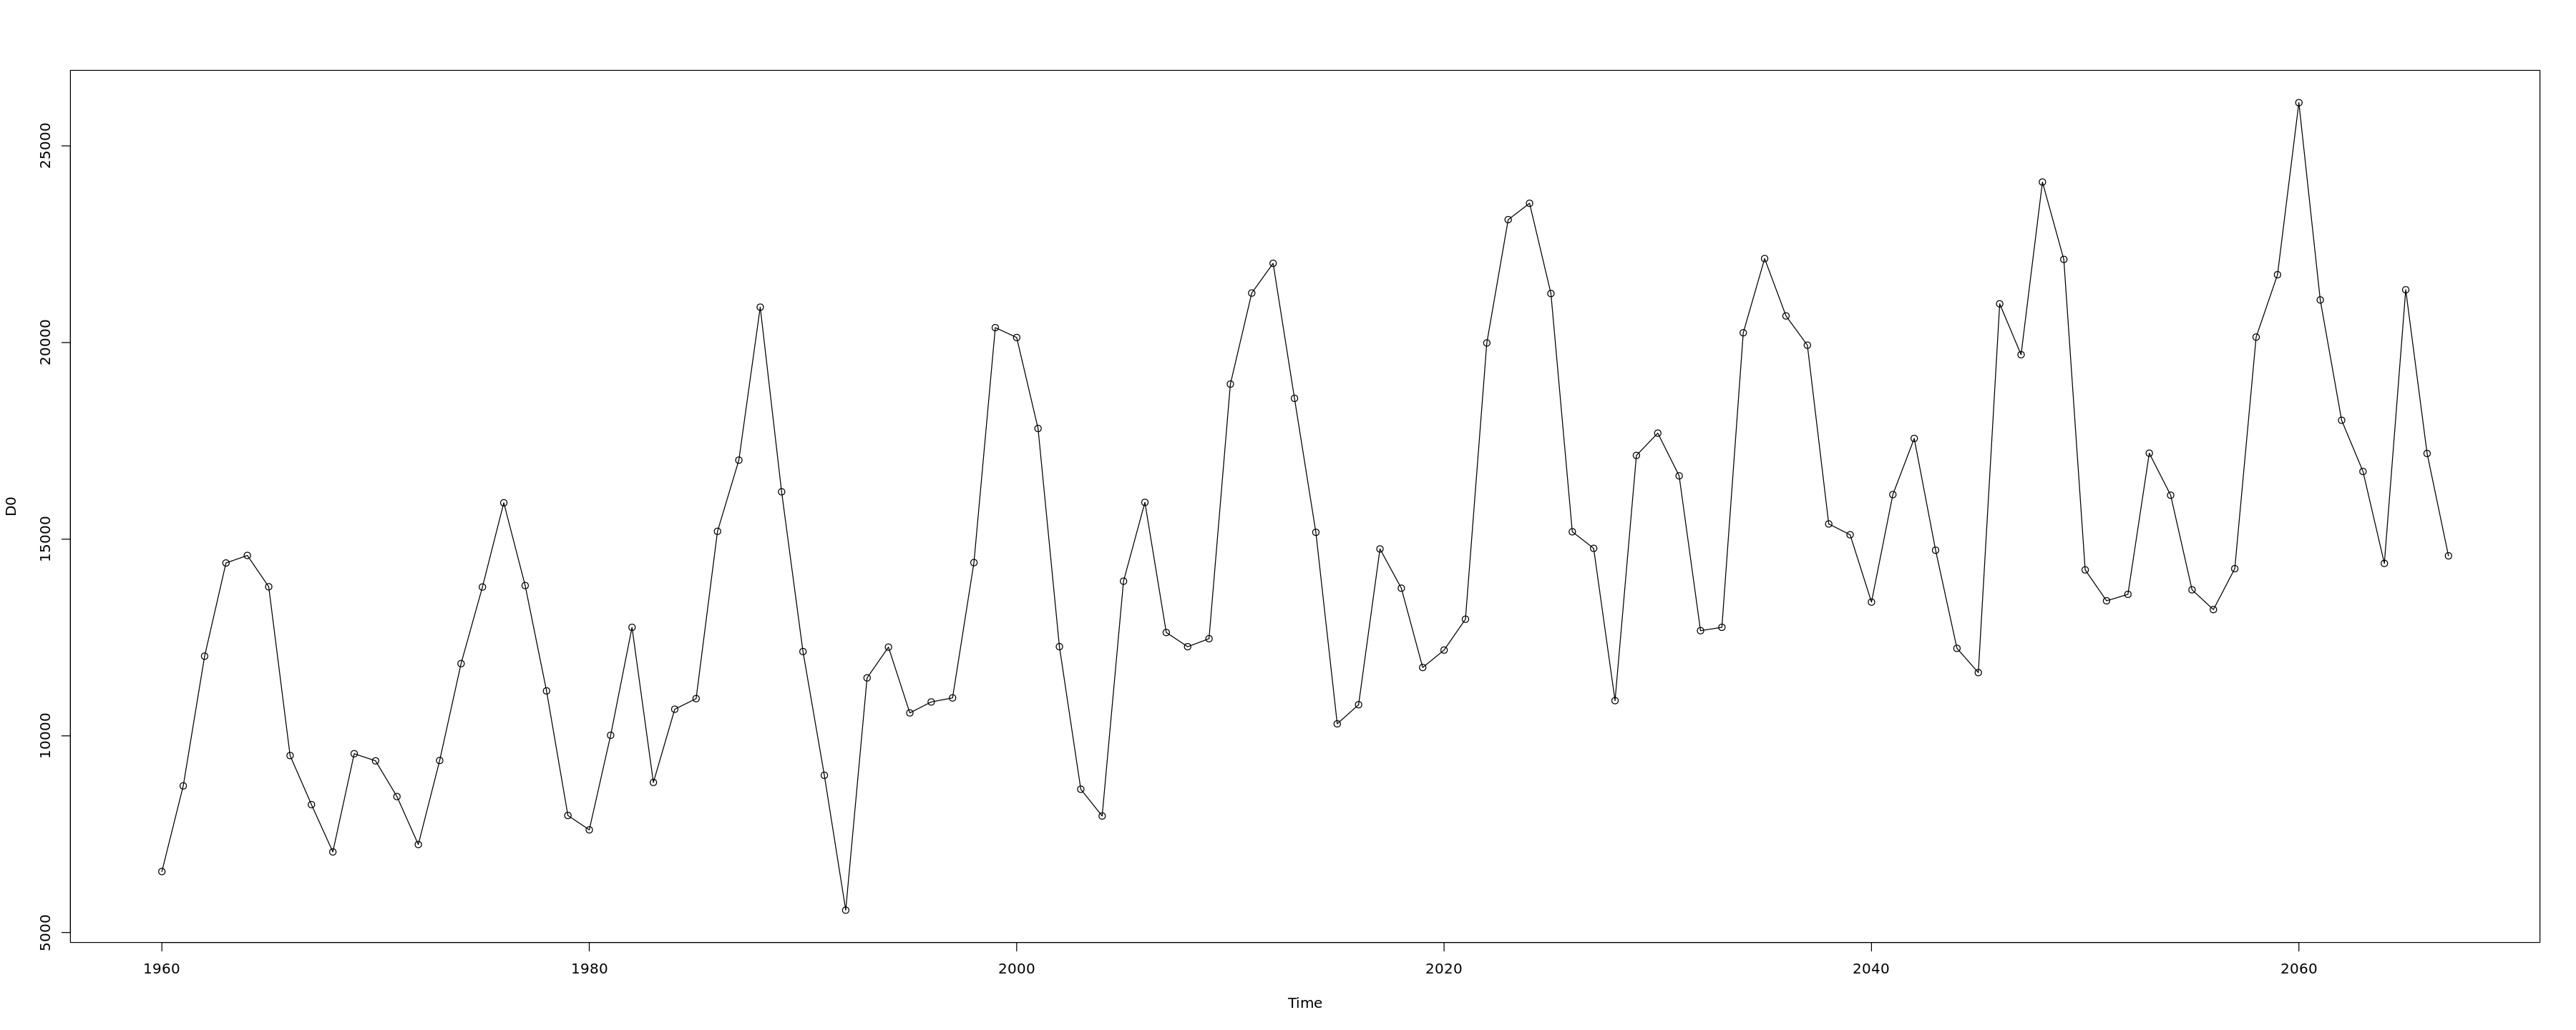

In [5]:
options(repr.plot.width=30, repr.plot.height=12)
plot(D0, type='o')

Looking at the graph, it appears that it is not stationary, but instead is gradually increasing.  It also appears that it may have a seasonal component.

In [6]:
Fit0 <- auto.arima(D0, stepwise = FALSE, approximation = FALSE)
Fit0

Series: D0 
ARIMA(2,1,2) with drift 

Coefficients:
         ar1      ar2      ma1     ma2    drift
      1.4951  -0.7798  -1.8793  0.9149  88.4266
s.e.  0.0882   0.0660   0.1211  0.1354  34.3670

sigma^2 estimated as 6759362:  log likelihood=-992.94
AIC=1997.88   AICc=1998.72   BIC=2013.92

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15 BL20 BL25 ML15  ML20  JB    SD      
[1,] 0    0    0    0.104 0.186 0.252 2538.404

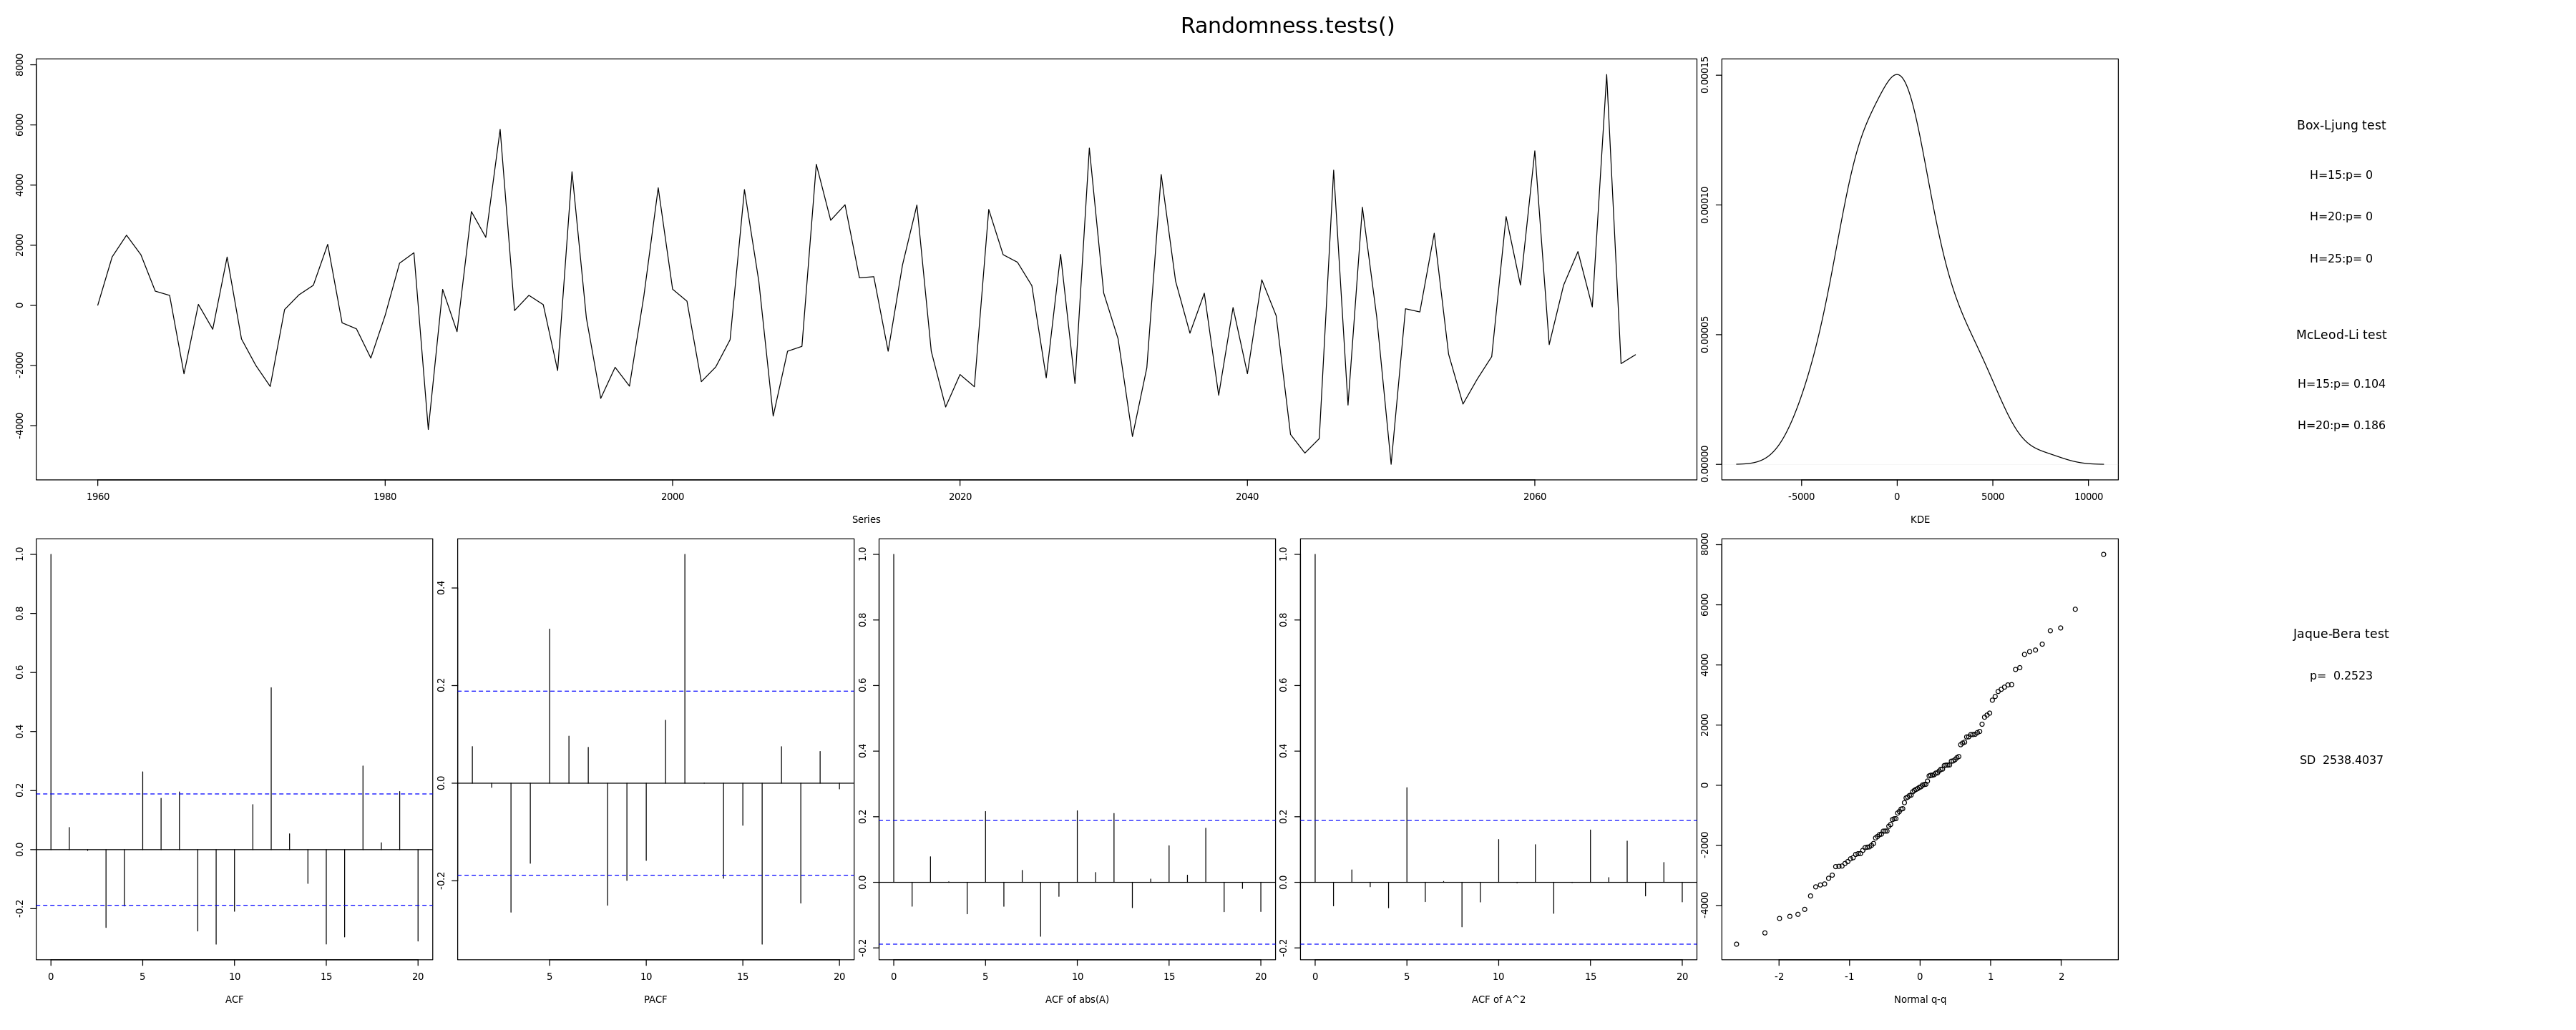

In [7]:
Randomness.tests(Fit0$residuals)

ACF and PACF graphs are showing a lot of correlation at higher lags, especially lag 12, indicating the data is seasonal.  The Box-Ljung numbers are all 0 confirming that there is still a lot of correlation.  Jaque-Bera number is high, indicating the errors do not follow a normal distribution.

### Try with lambda = 0

In [8]:
Fit0 <- auto.arima(D0, lambda = 0, stepwise = FALSE, approximation = FALSE)
Fit0

Series: D0 
ARIMA(0,1,5) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ma1      ma2      ma3      ma4     ma5   drift
      -0.3587  -0.4776  -0.4709  -0.4136  0.8225  0.0059
s.e.   0.0715   0.0757   0.0745   0.0791  0.0926  0.0018

sigma^2 estimated as 0.03294:  log likelihood=29.89
AIC=-45.77   AICc=-44.64   BIC=-27.06

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15 BL20 BL25 ML15  ML20  JB    SD   
[1,] 0    0    0    0.187 0.398 0.613 0.176

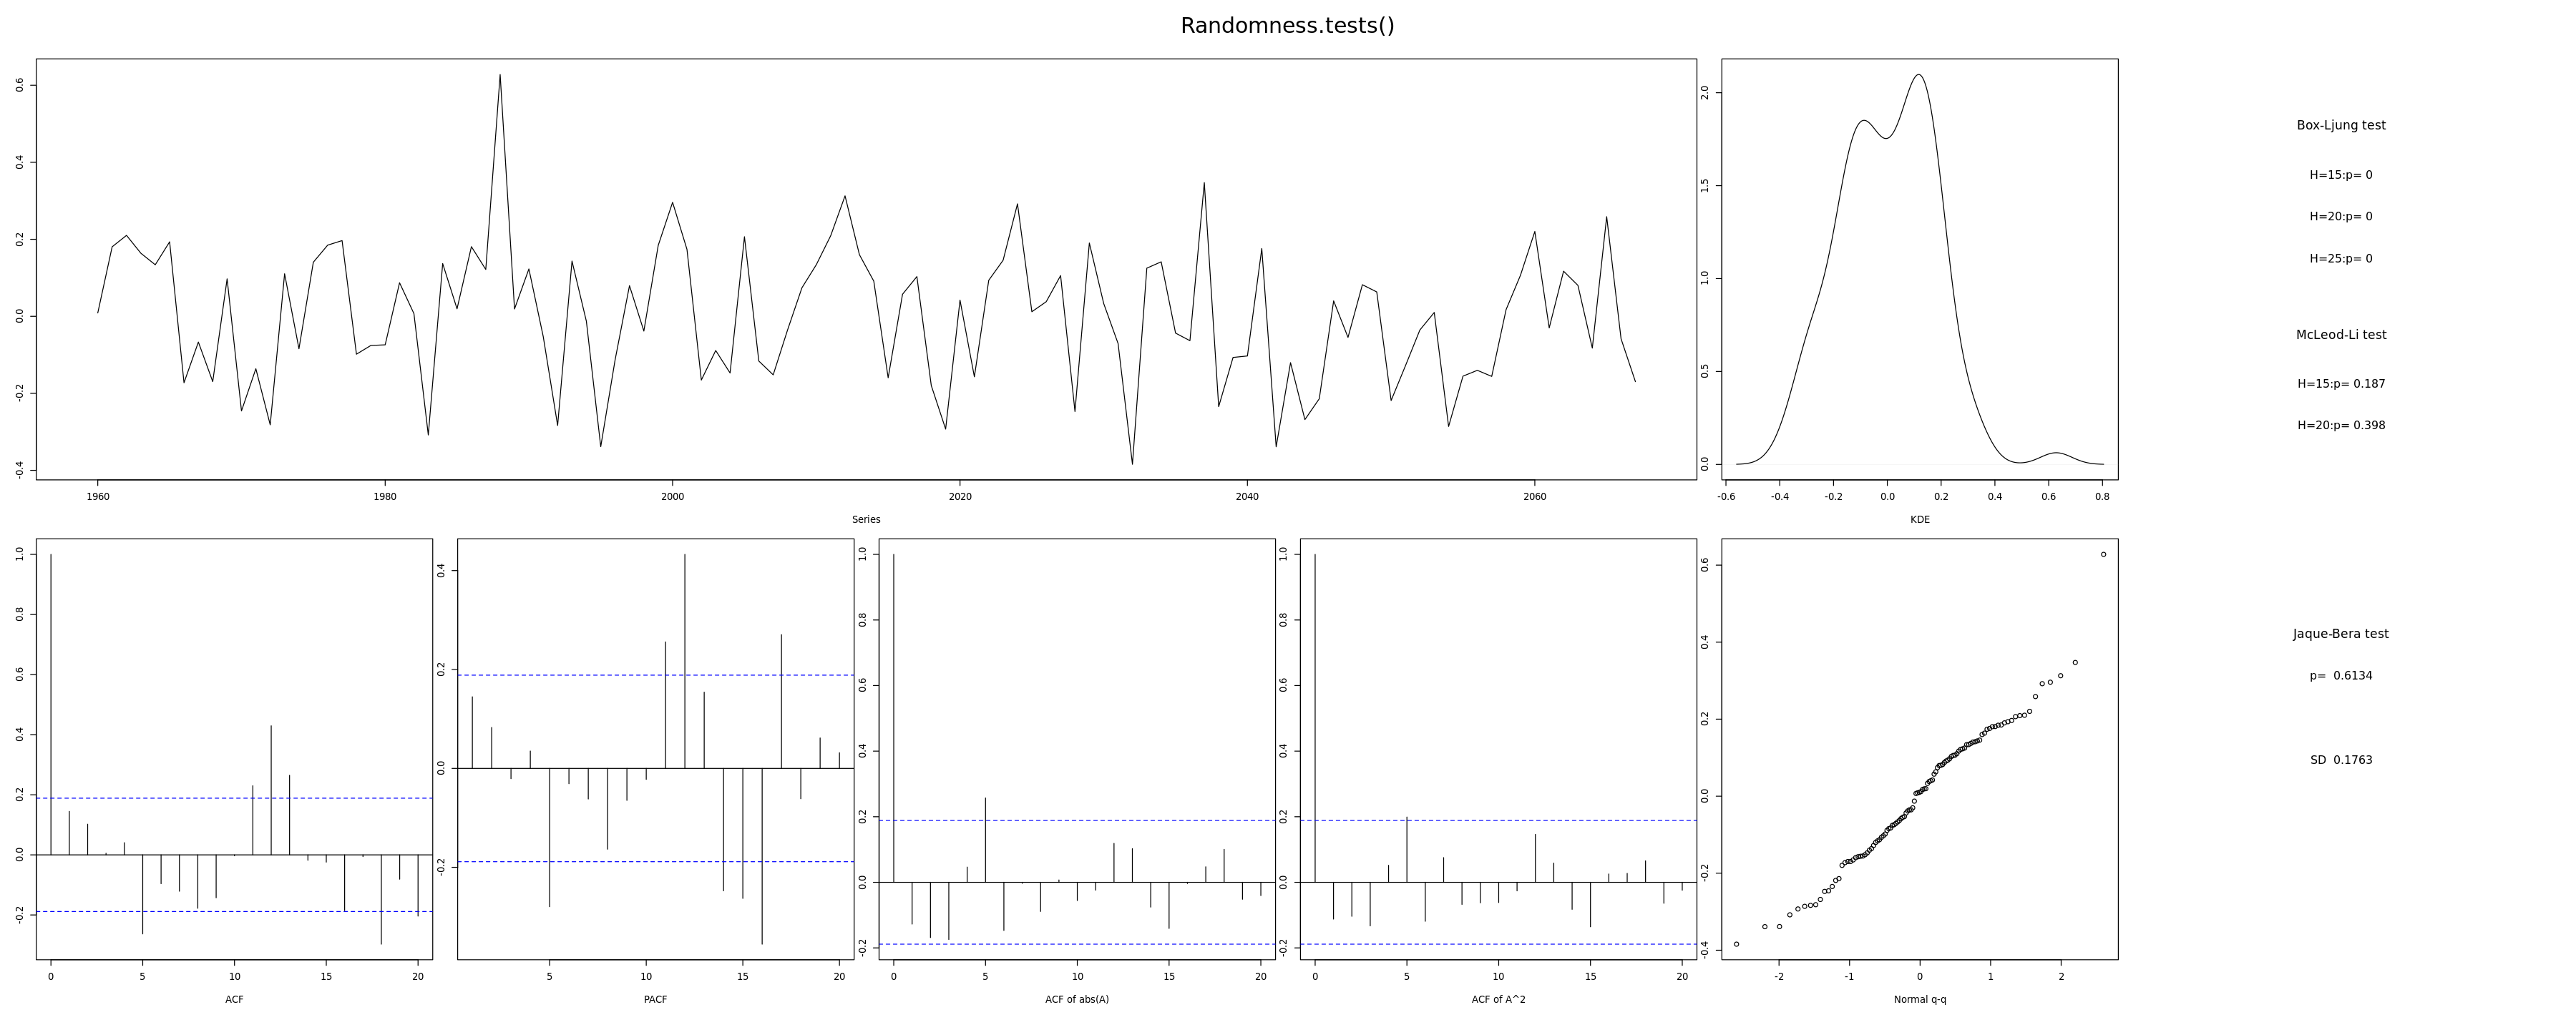

In [9]:
Randomness.tests(Fit0$residuals)

AICc is alot better.  Still have issues with residuals

### Try forcing auto.arima() to look at higher p and q values

In [10]:
Fit00 <- auto.arima(D0, stepwise = FALSE, lambda=0, approximation = FALSE, max.p = 15, max.q = 15)
Fit00

Series: D0 
ARIMA(0,1,5) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ma1      ma2      ma3      ma4     ma5   drift
      -0.3587  -0.4776  -0.4709  -0.4136  0.8225  0.0059
s.e.   0.0715   0.0757   0.0745   0.0791  0.0926  0.0018

sigma^2 estimated as 0.03294:  log likelihood=29.89
AIC=-45.77   AICc=-44.64   BIC=-27.06

It returned the same model

### Try manually forcing higher p and q values

In [11]:
Fit01 <- Arima(D0, lambda=0, order=c(15,1,15), include.drift = TRUE)
Fit01

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: D0 
ARIMA(15,1,15) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ar2      ar3      ar4     ar5      ar6      ar7      ar8
      -1.127  -0.1508  -0.1006  -0.2970  0.0219  -0.1305  -0.2531  -0.0498
s.e.   0.391   0.1075   0.3149   0.2128  0.2737   0.2433   0.2112   0.2619
          ar9     ar10    ar11    ar12    ar13    ar14    ar15     ma1      ma2
      -0.0926  -0.3050  0.0106  0.8427  0.8700  0.1074  0.0086  0.6369  -0.6977
s.e.   0.2299   0.2115  0.2691  0.2383  0.3574     NaN  0.1358  0.3914      NaN
          ma3  ma4      ma5     ma6     ma7      ma8     ma9    ma10     ma11
      -0.3320    0  -0.3181  0.1836  0.0311  -0.5491  0.1702  0.4052  -0.1131
s.e.   0.4992  NaN   0.2658  0.1691  0.2095   0.1996  0.3231  0.2045   0.3032
         ma12     ma13    ma14    ma15   drift
      -0.4818  -0.3539  0.2098  0.2135  0.0062
s.e.   0.2981   0.3603  0.2615  0.2687  0.0008

sigma^2 estimated as 0.01033:  log likelihood=95.3
AIC=-126.59   AICc=

ar15, ar14 are not significant, remove them.

In [12]:
Fit01 <- Arima(D0, lambda=0, order=c(13,1,15), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(13,1,15) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -1.2240  -0.3239  -0.2372  -0.5087  -0.2864  -0.2839  -0.4346  -0.3613
s.e.   0.2637   0.4983   0.5226   0.5353   0.5464   0.5151   0.5100   0.5304
          ar9     ar10     ar11    ar12    ar13     ma1      ma2      ma3
      -0.2575  -0.4923  -0.2821  0.6637  0.7352  0.7044  -0.6039  -0.2365
s.e.   0.5531   0.5020   0.5111  0.5612  0.3127  0.3091   0.4169   0.3003
         ma4      ma5      ma6      ma7      ma8      ma9    ma10    ma11
      0.1856  -0.1224  -0.0747  -0.0323  -0.2463  -0.0771  0.2757  0.0541
s.e.  0.2544   0.2289   0.2299   0.1837   0.2648   0.2002  0.3476  0.2331
         ma12     ma13     ma14     ma15   drift
      -0.3877  -0.2719  -0.0098  -0.1293  0.0062
s.e.   0.4248   0.1883   0.5550   0.2650  0.0007

sigma^2 estimated as 0.01088:  log likelihood=94.55
AIC=-129.1   AICc=-104.62   BIC=-48.

ma15, ma14 are not significant, remove them.

In [13]:
Fit01 <- Arima(D0, lambda=0, order=c(13,1,13), include.drift = TRUE)
Fit01

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: D0 
ARIMA(13,1,13) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1     ar2      ar3      ar4     ar5      ar6      ar7     ar8
      -0.9127  0.0142  -0.0189  -0.2999  0.0917  -0.0738  -0.2161  0.0038
s.e.      NaN     NaN      NaN      NaN     NaN      NaN      NaN     NaN
          ar9     ar10    ar11    ar12    ar13     ma1      ma2      ma3
      -0.0109  -0.2883  0.0786  0.8772  0.6485  0.3479  -0.7434  -0.1853
s.e.      NaN      NaN     NaN     NaN     NaN     NaN   0.1781      NaN
         ma4      ma5     ma6     ma7      ma8     ma9    ma10    ma11     ma12
      0.1324  -0.3867  0.0572  0.0248  -0.4403  0.0965  0.3631  -0.054  -0.3088
s.e.  0.1246      NaN     NaN  0.1230      NaN     NaN     NaN     NaN      NaN
        ma13   drift
      0.1048  0.0062
s.e.     NaN  0.0008

sigma^2 estimated as 0.01153:  log likelihood=91.03
AIC=-126.06   AICc=-105.24   BIC=-51.22

Remove ar13 and ma13

In [14]:
Fit01 <- Arima(D0, lambda=0, order=c(12,1,12), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(12,1,12) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4     ar5      ar6      ar7      ar8
      -0.1082  -0.4564  -0.0889  -0.6123  0.0514  -0.5872  -0.1176  -0.4617
s.e.   0.4756   0.1774   0.4175   0.1630  0.4711   0.1642   0.4605   0.1766
          ar9     ar10    ar11    ar12      ma1     ma2      ma3     ma4
      -0.0692  -0.6436  0.0704  0.3780  -0.5221  0.3522  -0.4283  0.5150
s.e.   0.4176   0.1585  0.4828  0.1642   0.4758  0.3169   0.3777  0.3895
          ma5     ma6      ma7     ma8      ma9    ma10     ma11     ma12
      -0.4940  0.6006  -0.5540  0.3149  -0.3604  0.7258  -0.5763  -0.0470
s.e.   0.4486  0.3288   0.3484  0.3155   0.3142  0.3734   0.4723   0.3371
       drift
      0.0062
s.e.  0.0014

sigma^2 estimated as 0.0113:  log likelihood=89.25
AIC=-126.5   AICc=-108.95   BIC=-57.01

Remove ma12

In [15]:
Fit01 <- Arima(D0, lambda=0, order=c(12,1,11), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(12,1,11) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ar2      ar3      ar4      ar5      ar6      ar7     ar8
      0.0225  -0.2200  -0.2527  -0.2424  -0.0735  -0.2600  -0.3166  0.0060
s.e.  0.3659   0.2316   0.2555   0.2001   0.2265   0.1829   0.2173  0.2301
          ar9     ar10    ar11    ar12      ma1     ma2      ma3      ma4
      -0.2928  -0.3876  0.2069  0.3602  -0.6953  0.2317  -0.0565  -0.0205
s.e.   0.1736   0.2259  0.2469  0.1829   0.3708  0.3438   0.2676   0.1606
         ma5      ma6     ma7      ma8     ma9     ma10     ma11   drift
      0.0076  -0.0314  0.2380  -0.7293  0.7762  -0.1416  -0.2437  0.0061
s.e.  0.1314   0.0999  0.1039   0.1405  0.2824   0.3487   0.2142  0.0014

sigma^2 estimated as 0.01193:  log likelihood=86.27
AIC=-122.55   AICc=-106.5   BIC=-55.73

Remove ma11, ma10

In [16]:
Fit01 <- Arima(D0, lambda=0, order=c(12,1,9), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(12,1,9) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ar2      ar3      ar4     ar5      ar6     ar7      ar8
      0.1350  -0.1312  -0.1587  -0.1942  0.2136  -0.4542  0.1309  -0.1233
s.e.  0.4042   0.3180   0.3421   0.3103  0.3602   0.2848  0.3854   0.2926
          ar9     ar10    ar11    ar12      ma1     ma2      ma3     ma4
      -0.1494  -0.1761  0.1774  0.4844  -0.7414  0.1235  -0.0127  0.0543
s.e.   0.3311   0.2964  0.3350  0.2551   0.4105  0.2762   0.1924  0.2406
          ma5     ma6      ma7     ma8     ma9   drift
      -0.5087  0.6158  -0.6797  0.2000  0.1532  0.0062
s.e.   0.1918  0.1998   0.2838  0.2899  0.2371  0.0016

sigma^2 estimated as 0.01235:  log likelihood=85.54
AIC=-125.07   AICc=-111.77   BIC=-63.6

Remove ma9, ma8

In [17]:
Fit01 <- Arima(D0, lambda=0, order=c(12,1,7), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(12,1,7) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.6167  -0.6701  -0.6877  -0.8160  -0.4735  -0.8433  -0.5812  -0.6614
s.e.   0.3893   0.3111   0.2795   0.3231   0.3799   0.2437   0.3650   0.3188
          ar9     ar10     ar11    ar12     ma1     ma2     ma3     ma4
      -0.6663  -0.7492  -0.4571  0.0970  0.0225  0.1821  0.0987  0.2516
s.e.   0.2987   0.3094   0.3445  0.2346  0.3862  0.1534  0.1009  0.1563
          ma5     ma6      ma7   drift
      -0.3311  0.3397  -0.3854  0.0062
s.e.   0.1618  0.1882   0.2165  0.0015

sigma^2 estimated as 0.0121:  log likelihood=85.52
AIC=-129.04   AICc=-118.17   BIC=-72.91

Remove ar12

In [18]:
Fit01 <- Arima(D0, lambda=0, order=c(11,1,7), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(11,1,7) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.8946  -0.7827  -0.8886  -0.8913  -0.8580  -0.7797  -0.9058  -0.8708
s.e.   0.1255   0.0801   0.0911   0.0999   0.0847   0.0979   0.0877   0.0746
          ar9     ar10     ar11     ma1     ma2     ma3     ma4     ma5
      -0.7864  -0.9633  -0.6512  0.2691  0.0800  0.1643  0.0318  0.1909
s.e.   0.0817   0.0734   0.0978  0.1596  0.1289  0.1384  0.1671  0.1134
          ma6     ma7   drift
      -0.1344  0.3080  0.0063
s.e.   0.1497  0.1509  0.0020

sigma^2 estimated as 0.01398:  log likelihood=79.9
AIC=-119.8   AICc=-110.03   BIC=-66.34

Remove ma7

In [19]:
Fit01 <- Arima(D0, lambda=0, order=c(11,1,6), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(11,1,6) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.6743  -0.6720  -0.8975  -0.6551  -0.7723  -0.7439  -0.7130  -0.7431
s.e.   0.2513   0.1038   0.1133   0.1992   0.1259   0.1322   0.1503   0.1401
          ar9     ar10     ar11      ma1     ma2     ma3      ma4     ma5
      -0.7172  -0.8332  -0.4951  -0.0254  0.1350  0.3407  -0.2606  0.3262
s.e.   0.1080   0.1343   0.1701   0.2765  0.1602  0.1261   0.1982  0.1519
          ma6   drift
      -0.1652  0.0062
s.e.   0.1903  0.0017

sigma^2 estimated as 0.01394:  log likelihood=79.52
AIC=-121.04   AICc=-112.31   BIC=-70.26

Remove ma6

In [20]:
Fit01 <- Arima(D0, lambda=0, order=c(11,1,5), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(11,1,5) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.8431  -0.8332  -0.7934  -0.9784  -0.7470  -0.8421  -0.8306  -0.8488
s.e.   0.1342   0.0754   0.1042   0.0793   0.1083   0.0778   0.1009   0.0638
          ar9     ar10     ar11    ma1     ma2      ma3     ma4      ma5
      -0.7912  -0.9264  -0.6448  0.166  0.1998  -0.0050  0.2661  -0.1011
s.e.   0.0933   0.0686   0.1004  0.165  0.1383   0.1308  0.1409   0.1097
       drift
      0.0062
s.e.  0.0016

sigma^2 estimated as 0.01343:  log likelihood=81.1
AIC=-126.2   AICc=-118.43   BIC=-78.09

Remove ma5

In [21]:
Fit01 <- Arima(D0, lambda=0, order=c(11,1,4), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(11,1,4) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.8609  -0.8421  -0.8121  -0.9721  -0.7848  -0.8501  -0.8408  -0.8608
s.e.   0.1277   0.0717   0.0898   0.0883   0.0947   0.0759   0.0946   0.0635
          ar9     ar10     ar11     ma1     ma2     ma3     ma4   drift
      -0.8069  -0.9327  -0.6588  0.1908  0.2158  0.0298  0.2741  0.0062
s.e.   0.0854   0.0683   0.0910  0.1646  0.1293  0.1230  0.1484  0.0018

sigma^2 estimated as 0.0134:  log likelihood=80.68
AIC=-127.35   AICc=-120.48   BIC=-81.92

Remove ma4

In [22]:
Fit01 <- Arima(D0, lambda=0, order=c(11,1,3), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(11,1,3) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.7683  -0.8092  -0.8281  -0.8576  -0.7425  -0.8308  -0.7851  -0.8114
s.e.   0.1481   0.0756   0.0950   0.0903   0.1016   0.0762   0.1028   0.0789
          ar9     ar10     ar11     ma1     ma2     ma3   drift
      -0.7708  -0.8904  -0.6130  0.0569  0.2521  0.0350  0.0062
s.e.   0.0877   0.0753   0.1075  0.1757  0.1293  0.1164  0.0015

sigma^2 estimated as 0.01363:  log likelihood=79.38
AIC=-126.76   AICc=-120.72   BIC=-84

Remove ma3

In [23]:
Fit01 <- Arima(D0, lambda=0, order=c(11,1,2), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(11,1,2) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.7551  -0.8155  -0.8133  -0.8532  -0.7375  -0.8267  -0.7764  -0.8091
s.e.   0.1557   0.0711   0.0880   0.0933   0.1049   0.0767   0.1046   0.0810
          ar9     ar10     ar11     ma1     ma2   drift
      -0.7639  -0.8873  -0.6061  0.0430  0.2625  0.0062
s.e.   0.0912   0.0769   0.1127  0.1846  0.1328  0.0015

sigma^2 estimated as 0.0135:  log likelihood=79.34
AIC=-128.67   AICc=-123.4   BIC=-88.58

Remove ma2

In [24]:
Fit01 <- Arima(D0, lambda=0, order=c(11,1,1), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(11,1,1) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.8702  -0.7645  -0.8497  -0.8914  -0.7636  -0.8302  -0.8202  -0.8245
s.e.   0.1043   0.0718   0.0697   0.0763   0.0875   0.0721   0.0844   0.0697
          ar9     ar10     ar11     ma1   drift
      -0.8058  -0.9111  -0.6383  0.1433  0.0062
s.e.   0.0711   0.0735   0.0839  0.1209  0.0013

sigma^2 estimated as 0.01395:  log likelihood=77.22
AIC=-126.44   AICc=-121.87   BIC=-89.02

Remove ma1

In [25]:
Fit01 <- Arima(D0, lambda=0, order=c(11,1,0), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(11,1,0) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.7753  -0.7258  -0.8075  -0.8413  -0.7061  -0.7946  -0.7647  -0.7844
s.e.   0.0788   0.0668   0.0645   0.0674   0.0774   0.0663   0.0753   0.0653
          ar9     ar10     ar11   drift
      -0.7597  -0.8638  -0.5765  0.0062
s.e.   0.0646   0.0653   0.0779  0.0012

sigma^2 estimated as 0.01399:  log likelihood=76.56
AIC=-127.13   AICc=-123.21   BIC=-92.38

Try adding back in ar12

In [26]:
Fit01 <- Arima(D0, lambda=0, order=c(12,1,0), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(12,1,0) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.6843  -0.5903  -0.6915  -0.7190  -0.5876  -0.6722  -0.6547  -0.6540
s.e.   0.0973   0.1095   0.0985   0.1034   0.1081   0.1023   0.1028   0.1061
          ar9     ar10     ar11    ar12   drift
      -0.6358  -0.7491  -0.4575  0.1523  0.0062
s.e.   0.1024   0.0984   0.1089  0.0980  0.0014

sigma^2 estimated as 0.0138:  log likelihood=77.75
AIC=-127.5   AICc=-122.94   BIC=-90.08

Try adding back in ar13

In [27]:
Fit01 <- Arima(D0, lambda=0, order=c(13,1,0), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(13,1,0) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.7182  -0.4915  -0.5280  -0.5864  -0.4466  -0.5323  -0.5120  -0.5276
s.e.   0.0958   0.1156   0.1216   0.1178   0.1234   0.1183   0.1194   0.1183
          ar9     ar10     ar11    ar12    ar13   drift
      -0.4820  -0.6043  -0.3279  0.2981  0.2117  0.0062
s.e.   0.1222   0.1170   0.1216  0.1161  0.0963  0.0017

sigma^2 estimated as 0.01328:  log likelihood=80.09
AIC=-130.18   AICc=-124.91   BIC=-90.09

Remove ar13

In [28]:
Fit01 <- Arima(D0, lambda=0, order=c(13,1,0), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(13,1,0) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.7182  -0.4915  -0.5280  -0.5864  -0.4466  -0.5323  -0.5120  -0.5276
s.e.   0.0958   0.1156   0.1216   0.1178   0.1234   0.1183   0.1194   0.1183
          ar9     ar10     ar11    ar12    ar13   drift
      -0.4820  -0.6043  -0.3279  0.2981  0.2117  0.0062
s.e.   0.1222   0.1170   0.1216  0.1161  0.0963  0.0017

sigma^2 estimated as 0.01328:  log likelihood=80.09
AIC=-130.18   AICc=-124.91   BIC=-90.09

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15  BL20 BL25  ML15  ML20  JB    SD   
[1,] 0.931 0.53 0.704 0.683 0.717 0.037 0.107

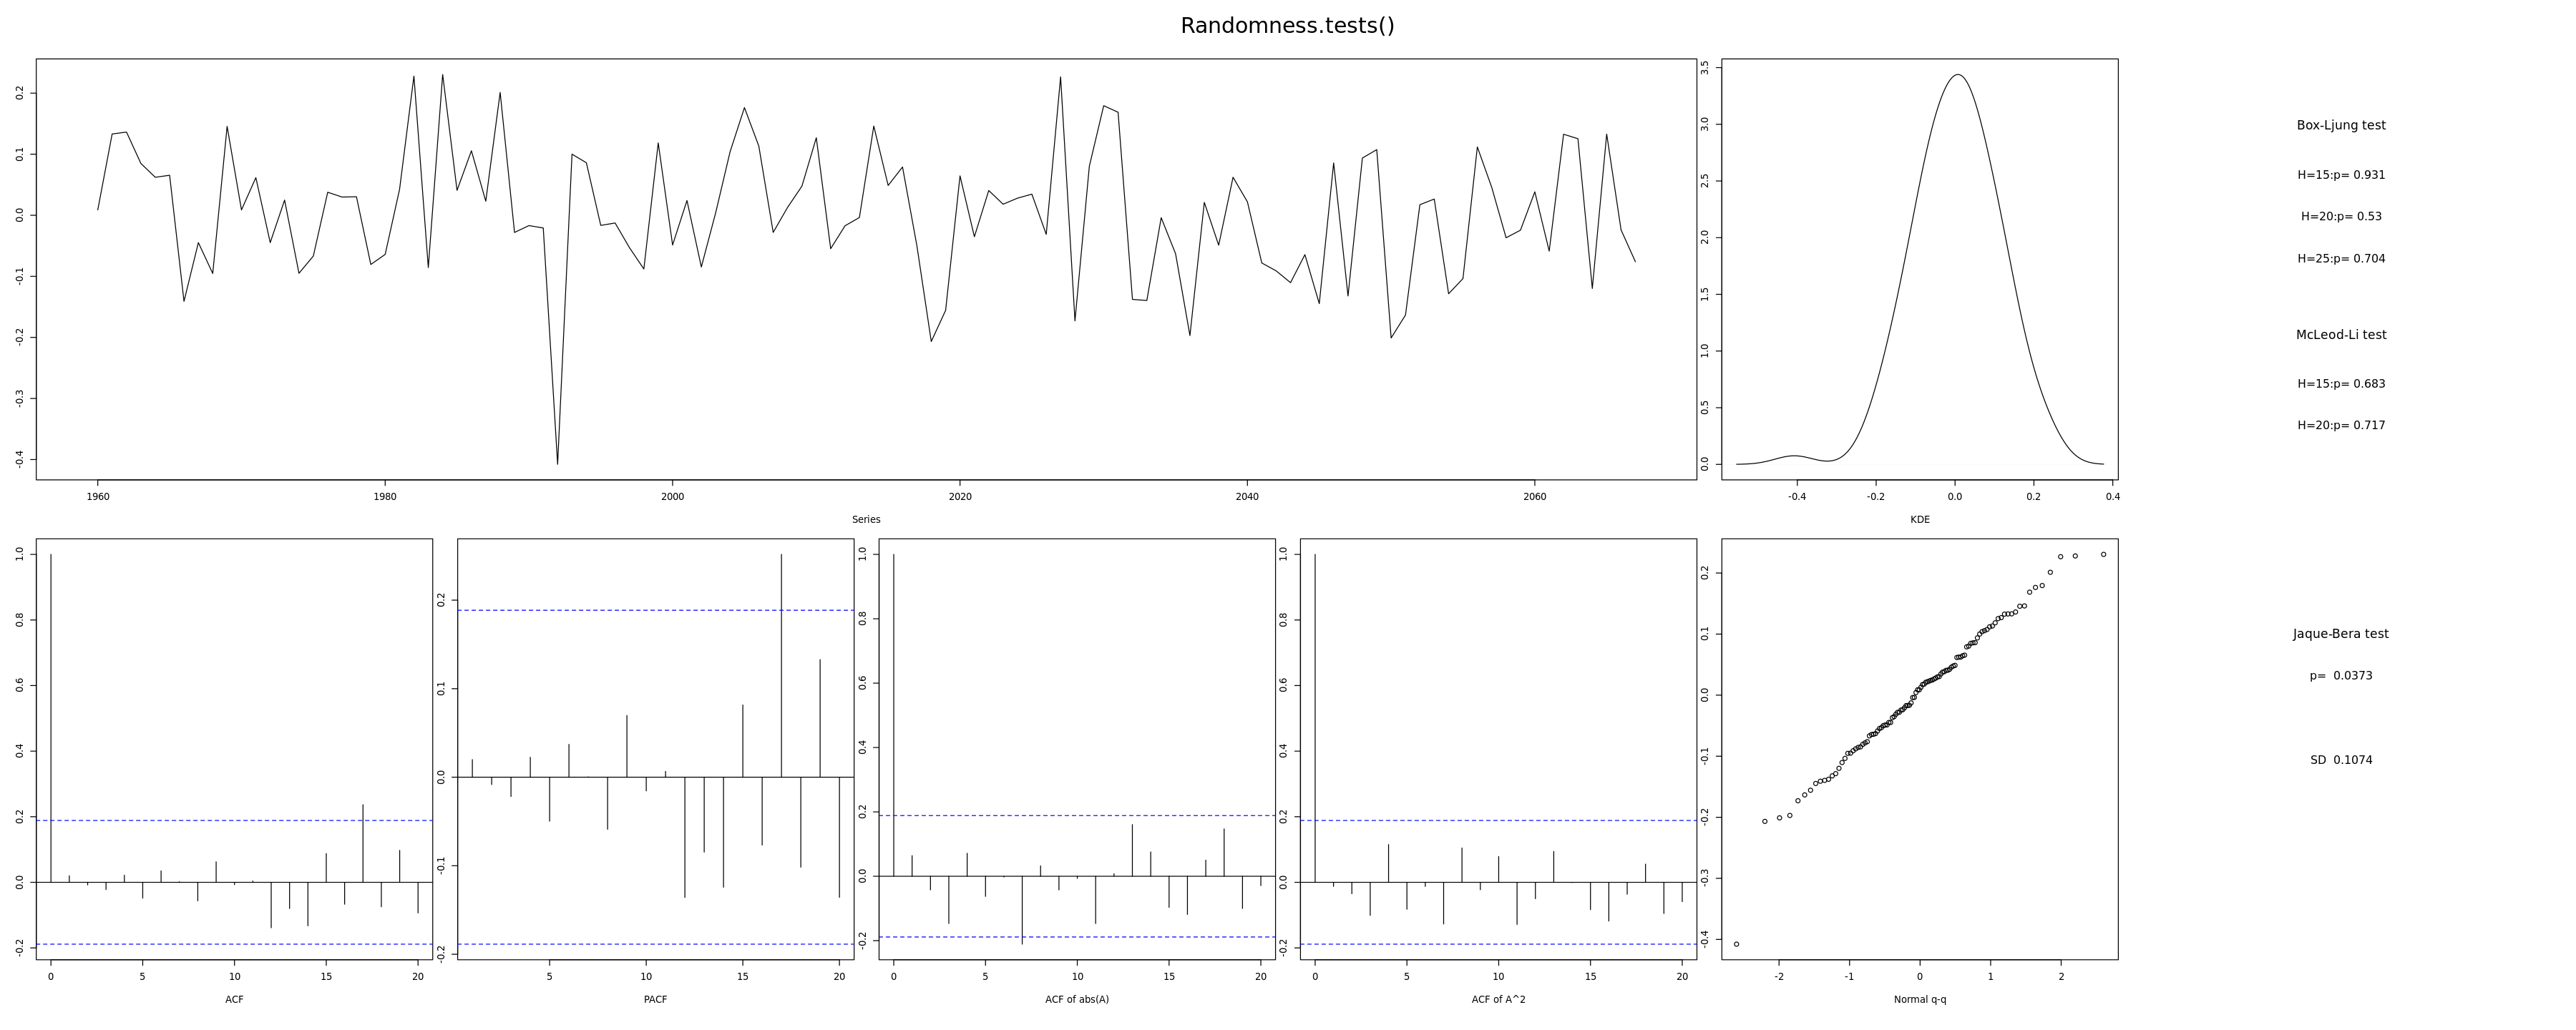

In [29]:
Randomness.tests(Fit01$residuals)

The one Box-Ljung number is low indicating remaining correlation.  ACF and PACF plots still indicate correlation at lag 14 and lag 17.

Try pushing p value up higher.

In [30]:
Fit01 <- Arima(D0, lambda=0, order=c(17,1,0), include.drift = TRUE)
Fit01

Series: D0 
ARIMA(17,1,0) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.6054  -0.4911  -0.5291  -0.5161  -0.4809  -0.5428  -0.4013  -0.4801
s.e.   0.0967   0.1136   0.1233   0.1343   0.1415   0.1442   0.1528   0.1475
          ar9     ar10     ar11    ar12    ar13    ar14    ar15     ar16
      -0.3973  -0.5611  -0.2182  0.3147  0.2118  0.0392  0.1156  -0.0783
s.e.   0.1506   0.1478   0.1534  0.1456  0.1421  0.1347  0.1245   0.1144
        ar17   drift
      0.2005  0.0063
s.e.  0.0967  0.0019

sigma^2 estimated as 0.01219:  log likelihood=86.12
AIC=-134.25   AICc=-125.51   BIC=-83.46

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15  BL20  BL25  ML15  ML20  JB    SD   
[1,] 0.943 0.978 0.978 0.983 0.971 0.017 0.101

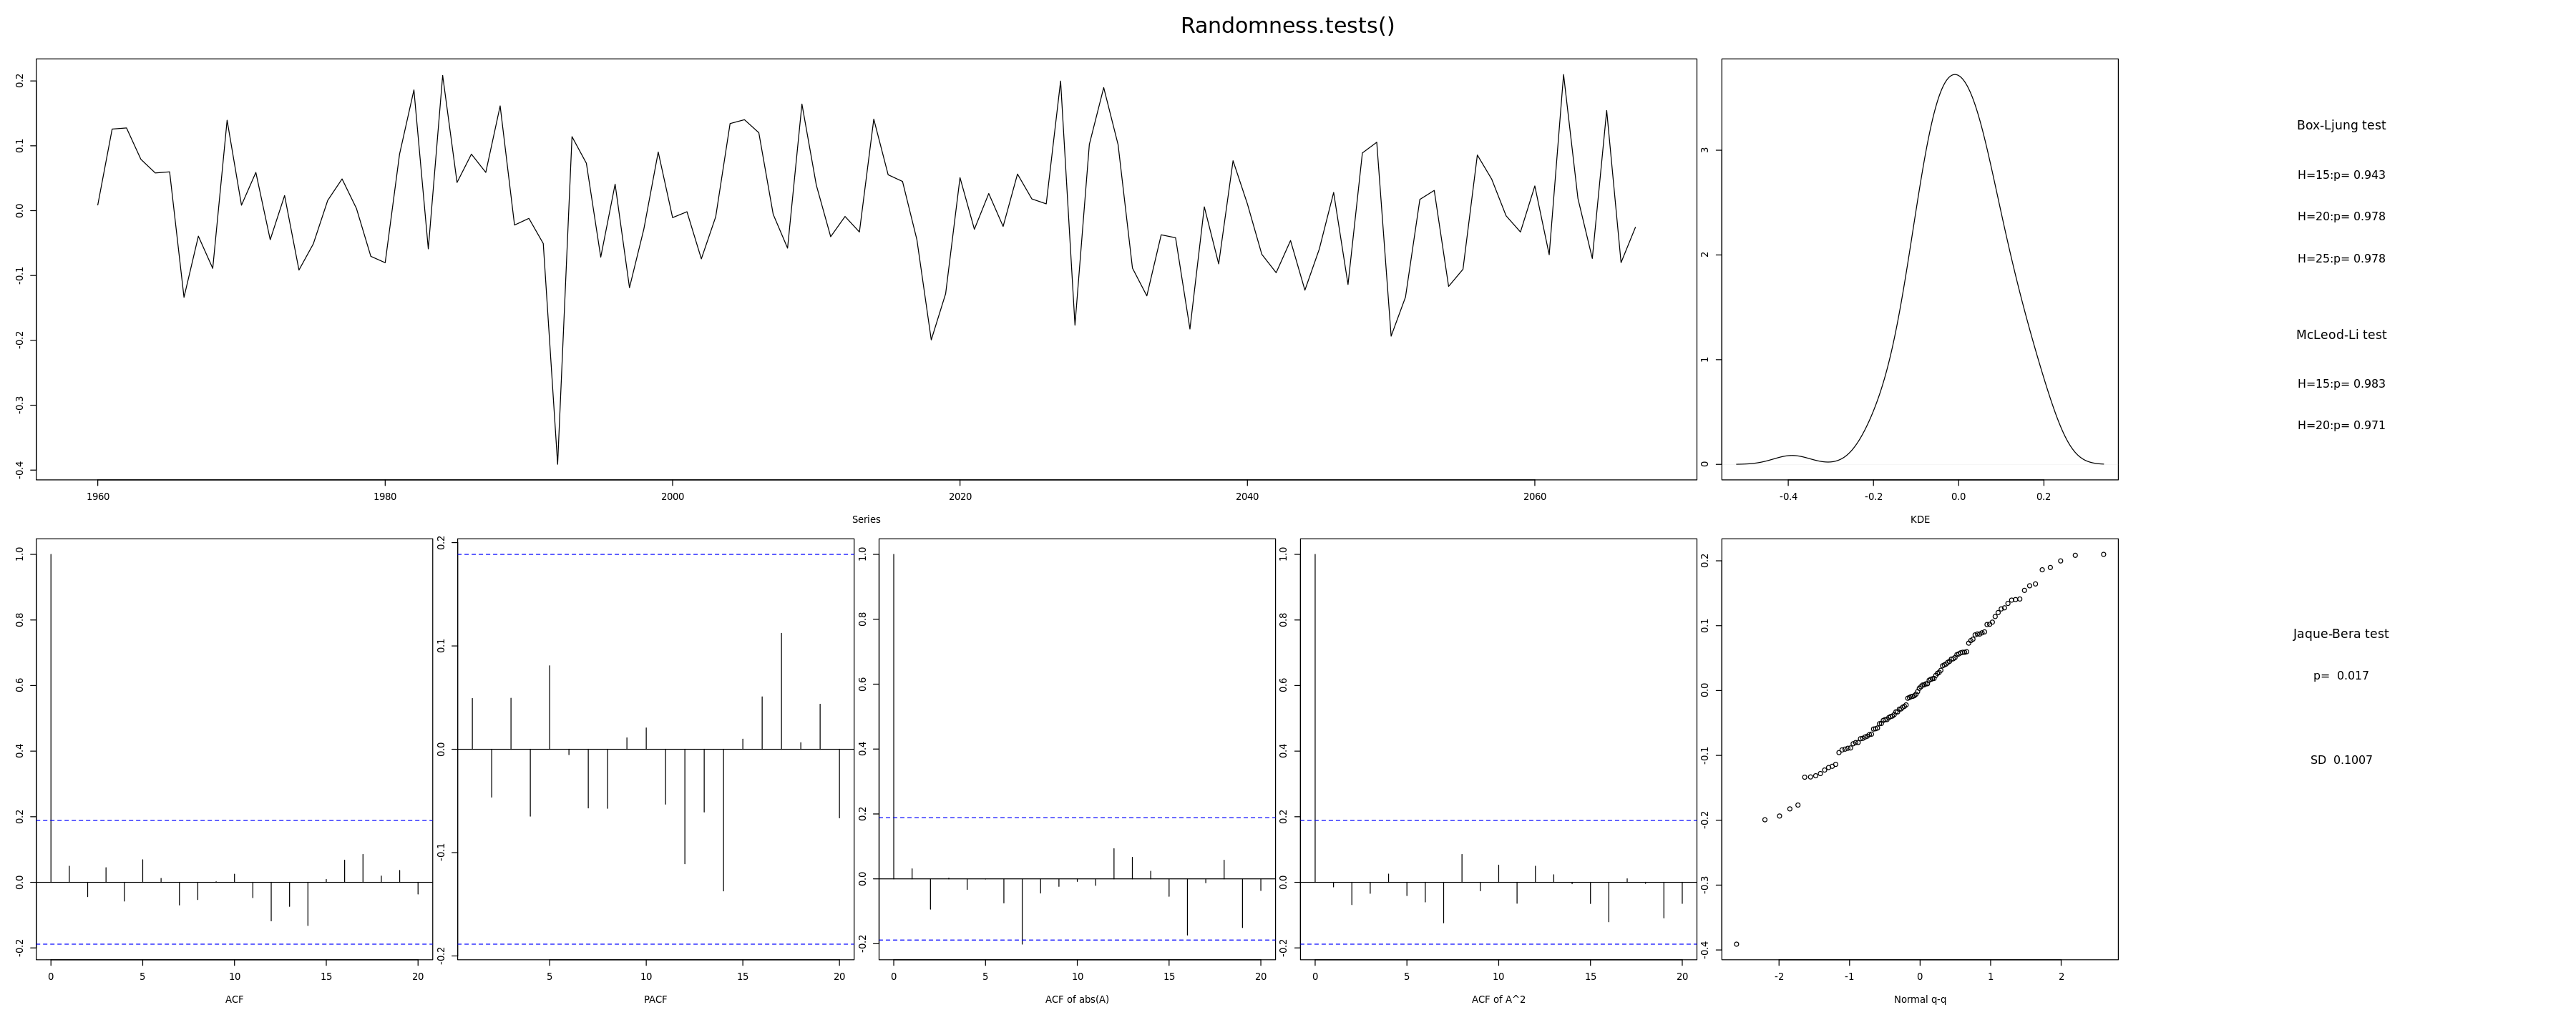

In [31]:
Randomness.tests(Fit01$residuals)

The residuals look good, however ar11, ar13, ar14, ar15, and ar16 are not significant.

### Try with linear trend

In [11]:
Fit02 <- auto.arima(D0, d=0, D=0, lambda=0, xreg=time(D0), stepwise=FALSE, approximation=FALSE, max.p = 17, max.q = 17)
Fit02

Series: D0 
Regression with ARIMA(0,0,4) errors 
Box Cox transformation: lambda= 0 

Coefficients:
         ma1     ma2      ma3      ma4  intercept    xreg
      0.7280  0.2743  -0.2116  -0.6900    -2.7933  0.0061
s.e.  0.0863  0.1324   0.1238   0.1113     1.2748  0.0006

sigma^2 estimated as 0.03288:  log likelihood=31.97
AIC=-49.94   AICc=-48.82   BIC=-31.16

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15 BL20 BL25 ML15  ML20  JB    SD   
[1,] 0    0    0    0.011 0.028 0.738 0.177

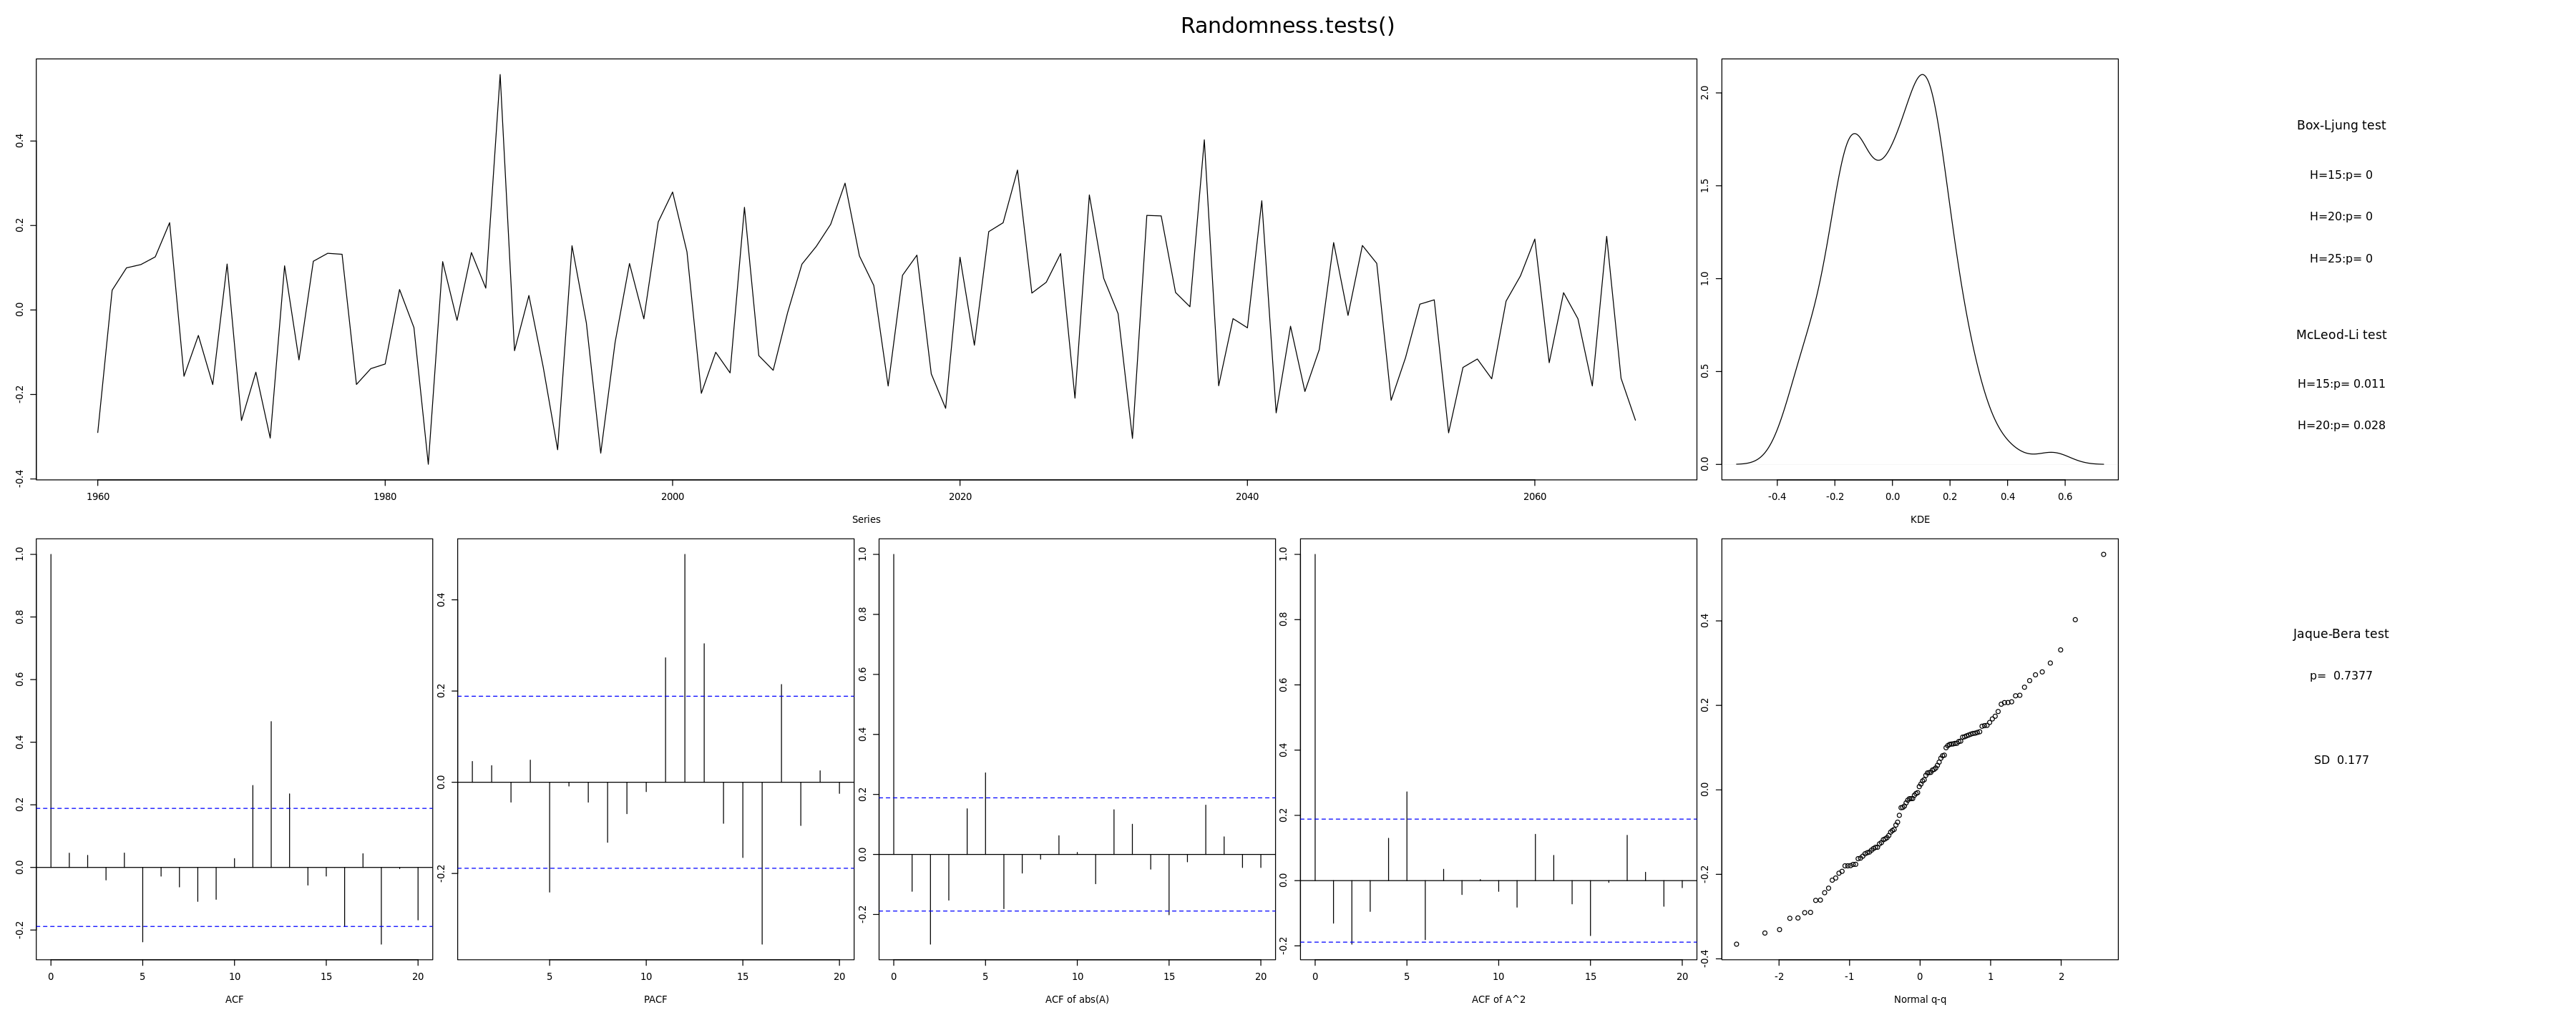

In [12]:
Randomness.tests(Fit02$residuals)

### Try linear trend and manually forcing higher p and q values

In [13]:
Fit02 <- Arima(D0, lambda=0, order=c(17,0,0), include.drift=FALSE,  xreg=time(D0))
Fit02

Series: D0 
Regression with ARIMA(17,0,0) errors 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ar2      ar3     ar4     ar5      ar6     ar7      ar8     ar9
      0.3137  0.1473  -0.0681  0.0410  0.0528  -0.1984  0.0416  -0.0651  0.0346
s.e.  0.0934  0.0965   0.0992  0.0965  0.0948   0.0752  0.0662   0.0724  0.0655
         ar10    ar11    ar12     ar13     ar14    ar15     ar16    ar17
      -0.1779  0.2993  0.5534  -0.1185  -0.1885  0.0683  -0.2383  0.1819
s.e.   0.0689  0.0683  0.0753   0.0943   0.0939  0.0953   0.0898  0.0694
      intercept    xreg
        -2.9609  0.0062
s.e.     1.4564  0.0007

sigma^2 estimated as 0.01254:  log likelihood=86.82
AIC=-133.63   AICc=-123.98   BIC=-79.99

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15  BL20  BL25  ML15  ML20  JB    SD   
[1,] 0.941 0.905 0.963 0.785 0.836 0.085 0.102

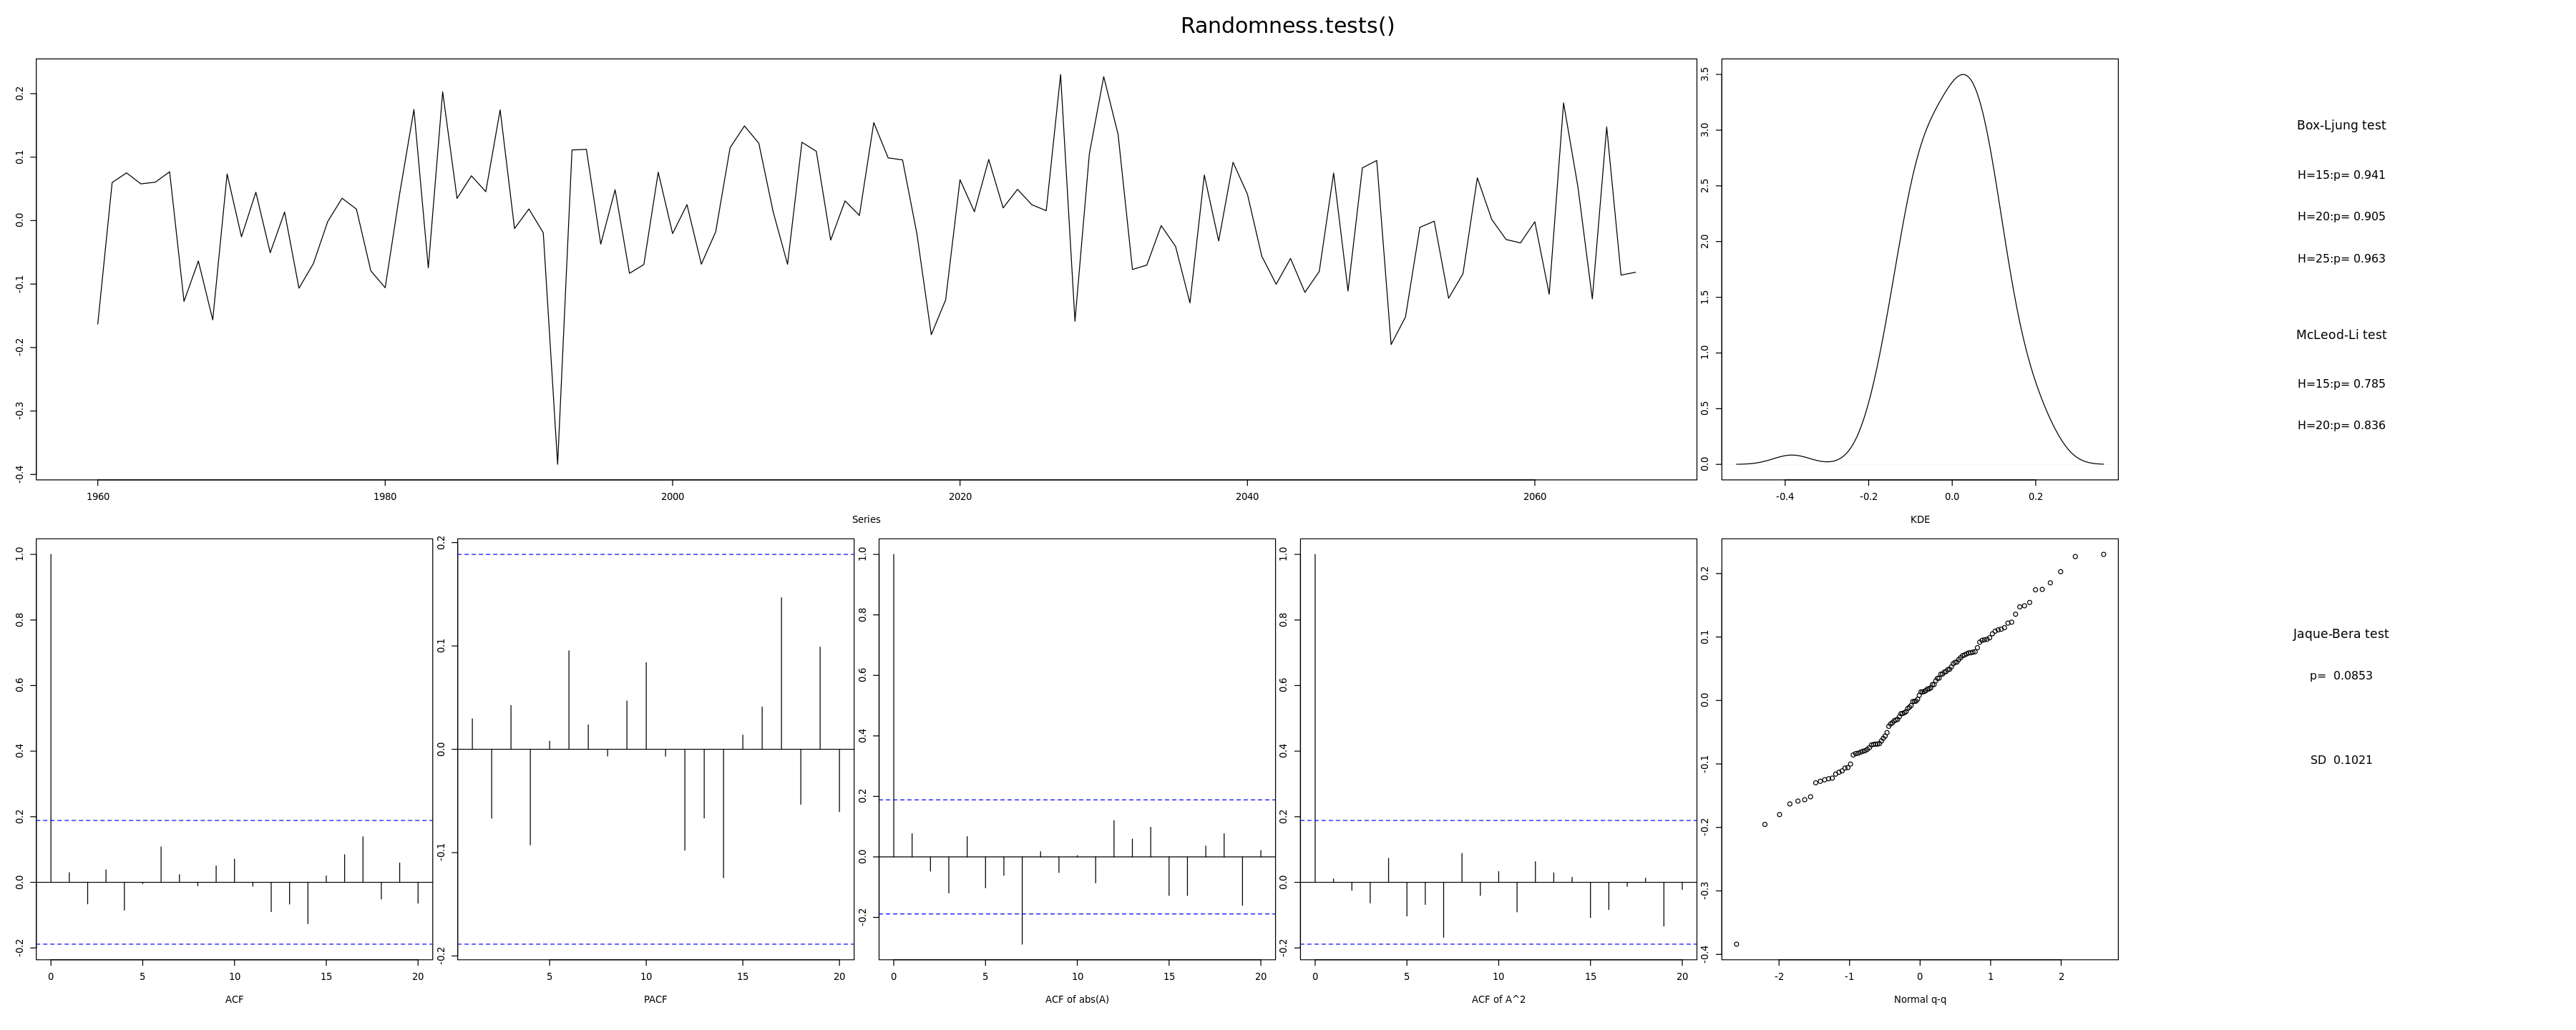

In [14]:
Randomness.tests(Fit02$residuals)

The residuals look good, the AICc is much better

## Try as seasonal time series

In [4]:
D1 <- ts(D[,2], start=c(1960,1), freq=12)

### See what auto.arima() gives

In [17]:
Fit2 <- auto.arima(D1, lambda=0, stepwise = FALSE, approximation = FALSE)
Fit2

Series: D1 
ARIMA(2,0,0)(0,1,2)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ar2     sma1     sma2   drift
      0.2283  0.2408  -0.5055  -0.2896  0.0062
s.e.  0.1014  0.1024   0.1724   0.1587  0.0008

sigma^2 estimated as 0.01179:  log likelihood=74.43
AIC=-136.85   AICc=-135.91   BIC=-121.46

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15  BL20  BL25  ML15  ML20  JB    SD 
[1,] 0.473 0.286 0.332 0.926 0.856 0.104 0.1

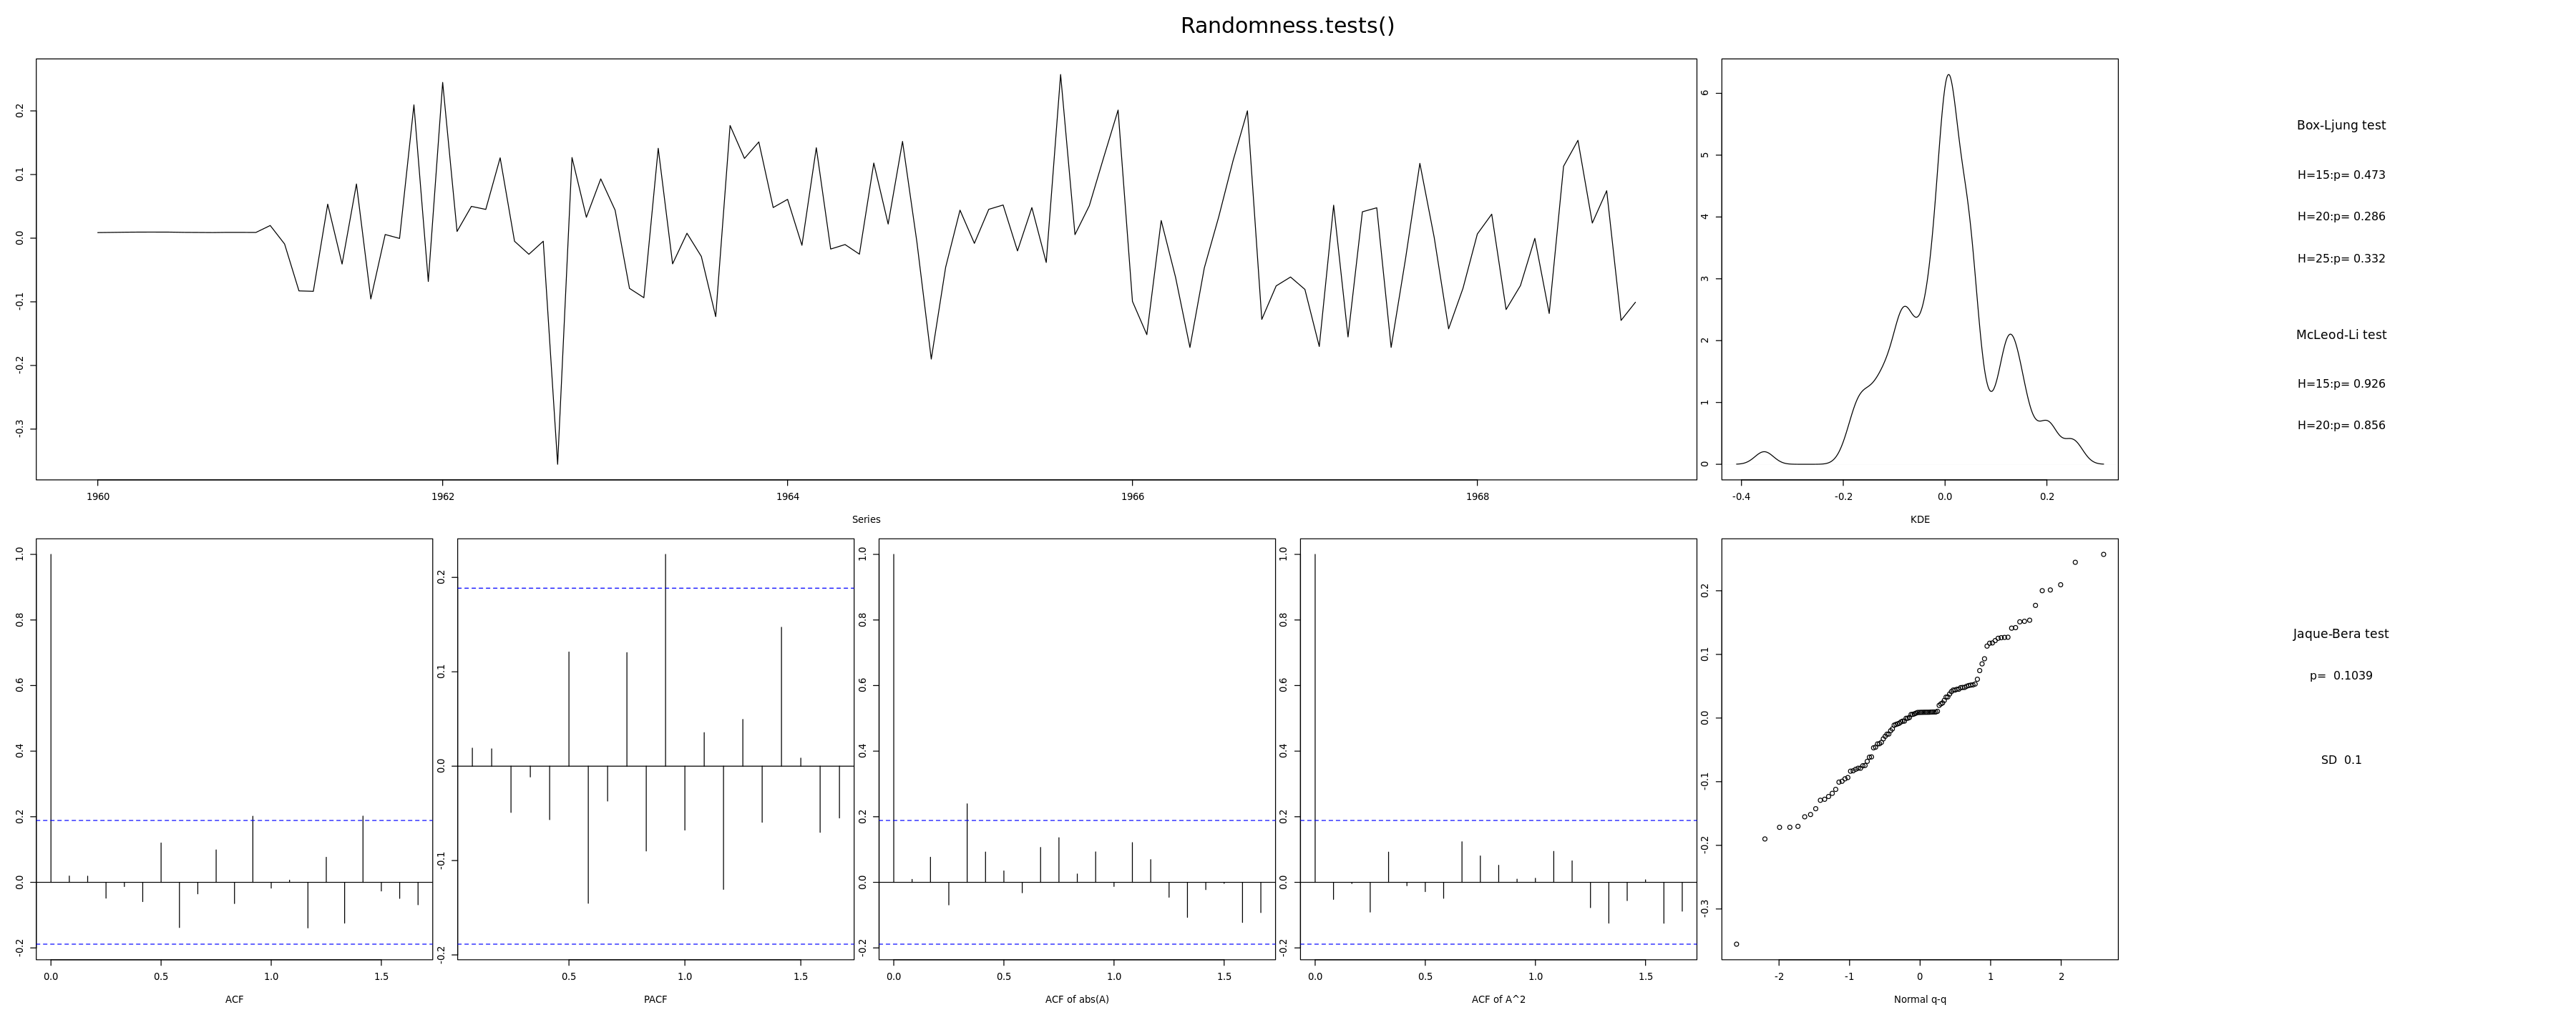

In [18]:
Randomness.tests(Fit2$residuals)

Auto.arima() once again a model of ARIMA(2,0,0)(0,1,2)[12] with drift.

  the residuals look good, however the ACF and PACF graphs are showing some correlation at lag 11 and 17

The sma2 term included in the model does not seems to be significant.  Try removing it

In [19]:
Fit22 <- Arima(D1, lambda=0, order=c(2,0,0), seasonal=c(0,1,1), include.drift = TRUE)
Fit22

Series: D1 
ARIMA(2,0,0)(0,1,1)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ar2     sma1   drift
      0.2420  0.2104  -0.4977  0.0062
s.e.  0.1074  0.1020   0.1447  0.0010

sigma^2 estimated as 0.01304:  log likelihood=72.36
AIC=-134.71   AICc=-134.05   BIC=-121.89

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15  BL20 BL25  ML15 ML20  JB    SD   
[1,] 0.334 0.15 0.151 0.9  0.848 0.019 0.106

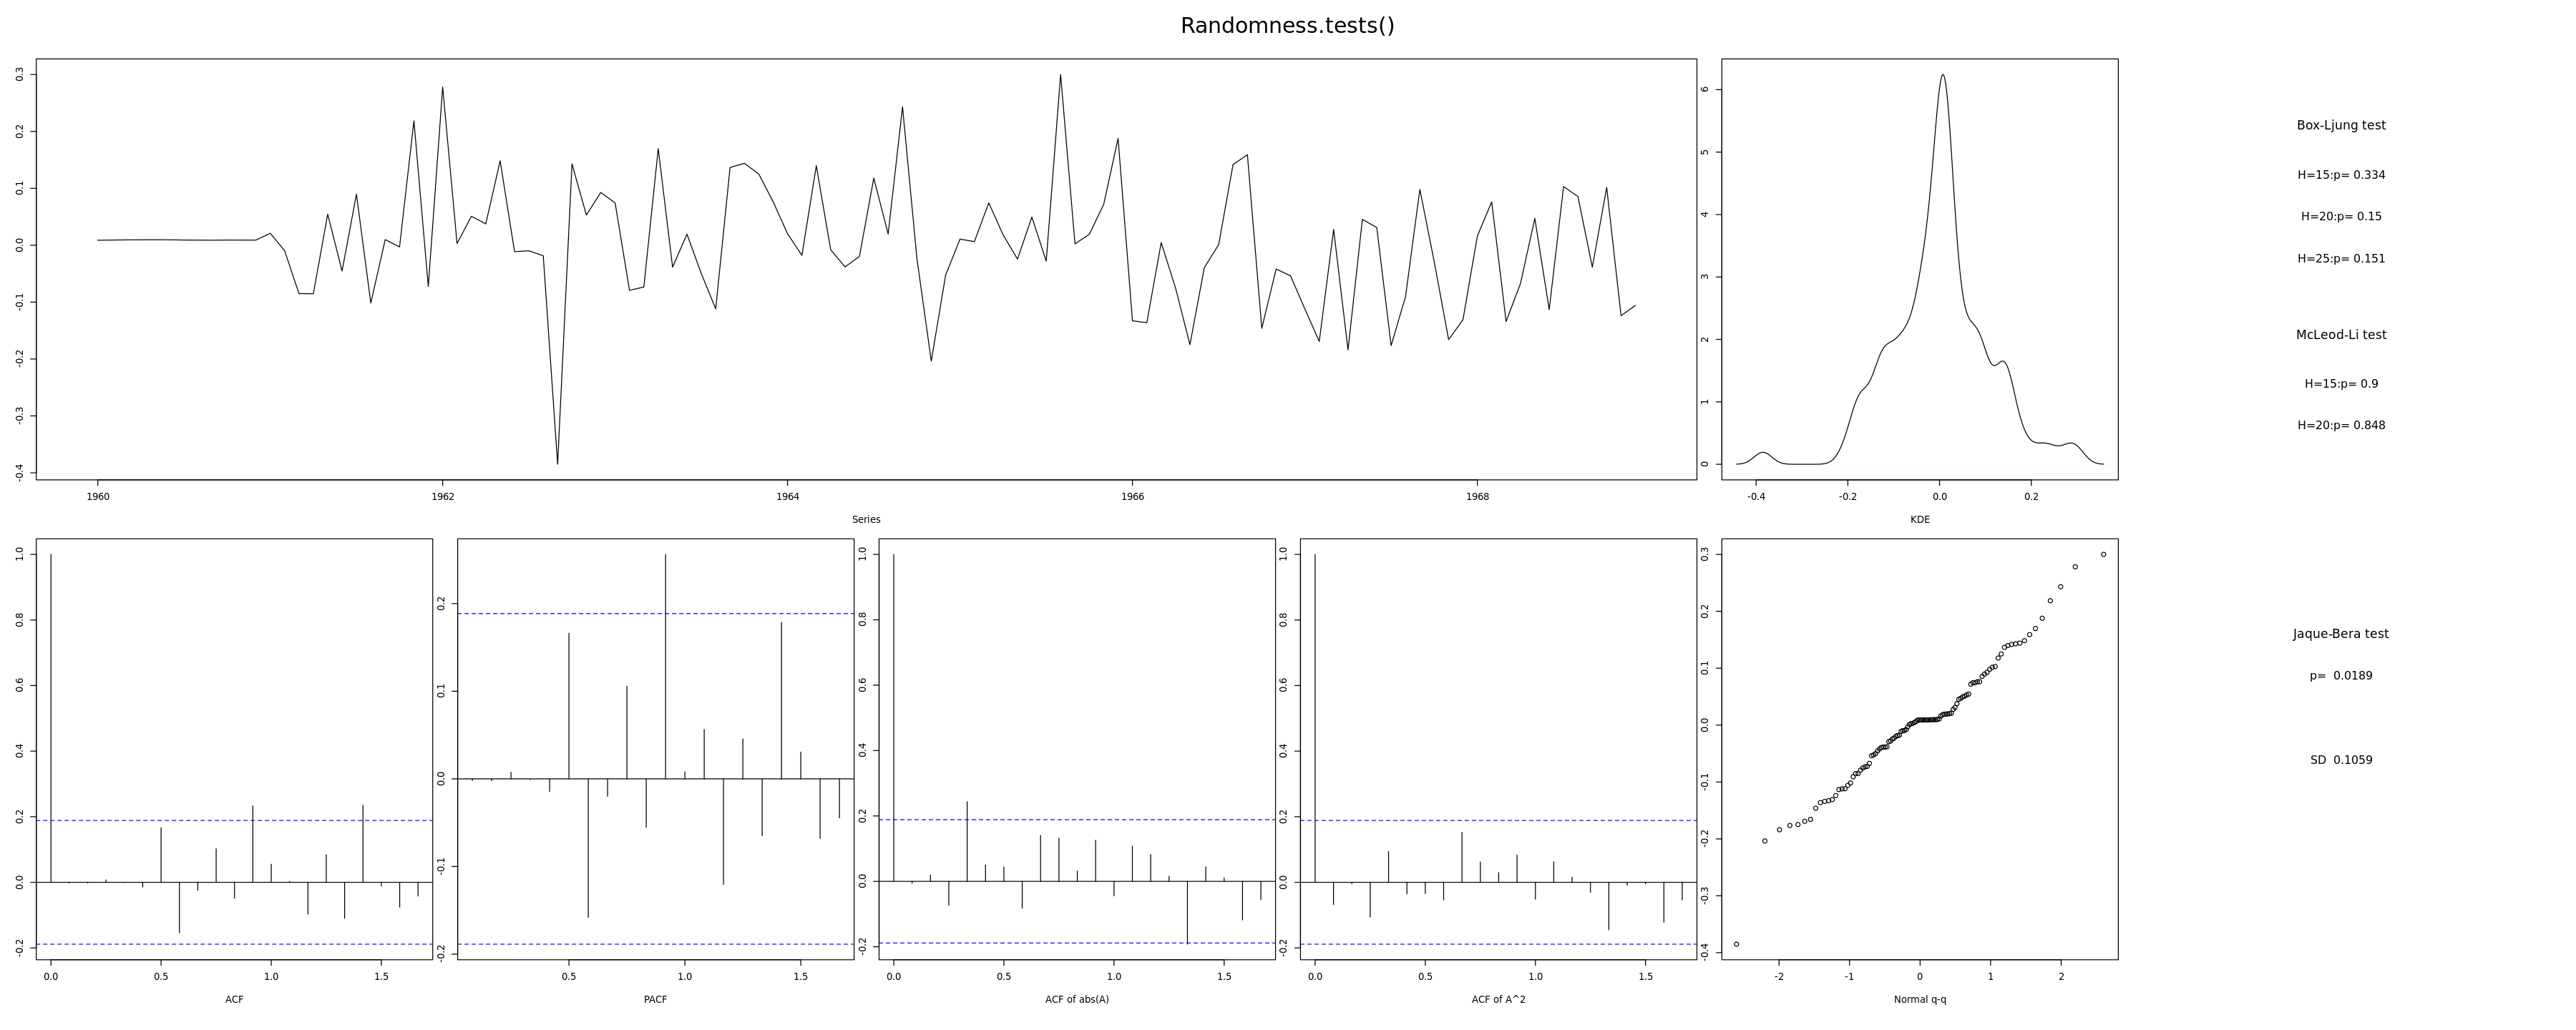

In [10]:
Randomness.tests(Fit22$residuals)

All the terms in the model are now significant.

However two of the Box-Ljung tests are showing correlation now, and the ACF and PACF plots have gotten worse, confirming this.

There seem to be some indicators that there may be correlation at lag 11.  Try forcing bigging p and q values.

### Try manually forcing p and q to be higher

In [11]:
Fit23 <- Arima(D1, lambda=0, order=c(11,0,11), seasonal=c(0,1,1), include.drift = TRUE)
Fit23

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: D1 
ARIMA(11,0,11)(0,1,1)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ar2      ar3     ar4      ar5     ar6      ar7     ar8
      0.6138  -0.2008  -0.3283  0.4131  -0.3835  0.3725  -0.4509  0.3036
s.e.  0.0834   0.0523   0.0511  0.0692   0.0528  0.0687   0.0417  0.0570
         ar9     ar10    ar11      ma1     ma2     ma3      ma4     ma5
      0.2145  -0.7116  0.8512  -0.0887  0.1462  0.4282  -0.1977  0.4032
s.e.  0.0438   0.0539  0.0891   0.1987     NaN  0.2112   0.2777     NaN
          ma6     ma7      ma8      ma9    ma10     ma11     sma1   drift
      -0.2531  0.3279  -0.2437  -0.2091  0.6769  -0.3850  -0.9987  0.0062
s.e.   0.2150  0.3668   0.1770      NaN  0.2132   0.0873   0.1721  0.0009

sigma^2 estimated as 0.00842:  log likelihood=89.88
AIC=-129.76   AICc=-111.19   BIC=-65.65

None of the ma terms are significant except ma10.  Try removing ma.

In [12]:
Fit24 <- Arima(D1, lambda=0, order=c(11,0,0), seasonal=c(0,1,1), include.drift = TRUE)
Fit24

Series: D1 
ARIMA(11,0,0)(0,1,1)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ar2      ar3     ar4      ar5     ar6      ar7      ar8
      0.3427  0.1225  -0.0185  0.0554  -0.0806  0.1814  -0.2220  -0.0005
s.e.  0.1036  0.1065   0.1031  0.1037   0.1025  0.1032   0.0987   0.1030
         ar9     ar10    ar11     sma1   drift
      0.1653  -0.0997  0.3101  -0.6995  0.0062
s.e.  0.1052   0.1047  0.1054   0.1387  0.0012

sigma^2 estimated as 0.01162:  log likelihood=80.67
AIC=-133.34   AICc=-128.15   BIC=-97.44

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15 BL20  BL25  ML15 ML20  JB SD   
[1,] 1    0.999 0.994 0.77 0.769 0  0.075

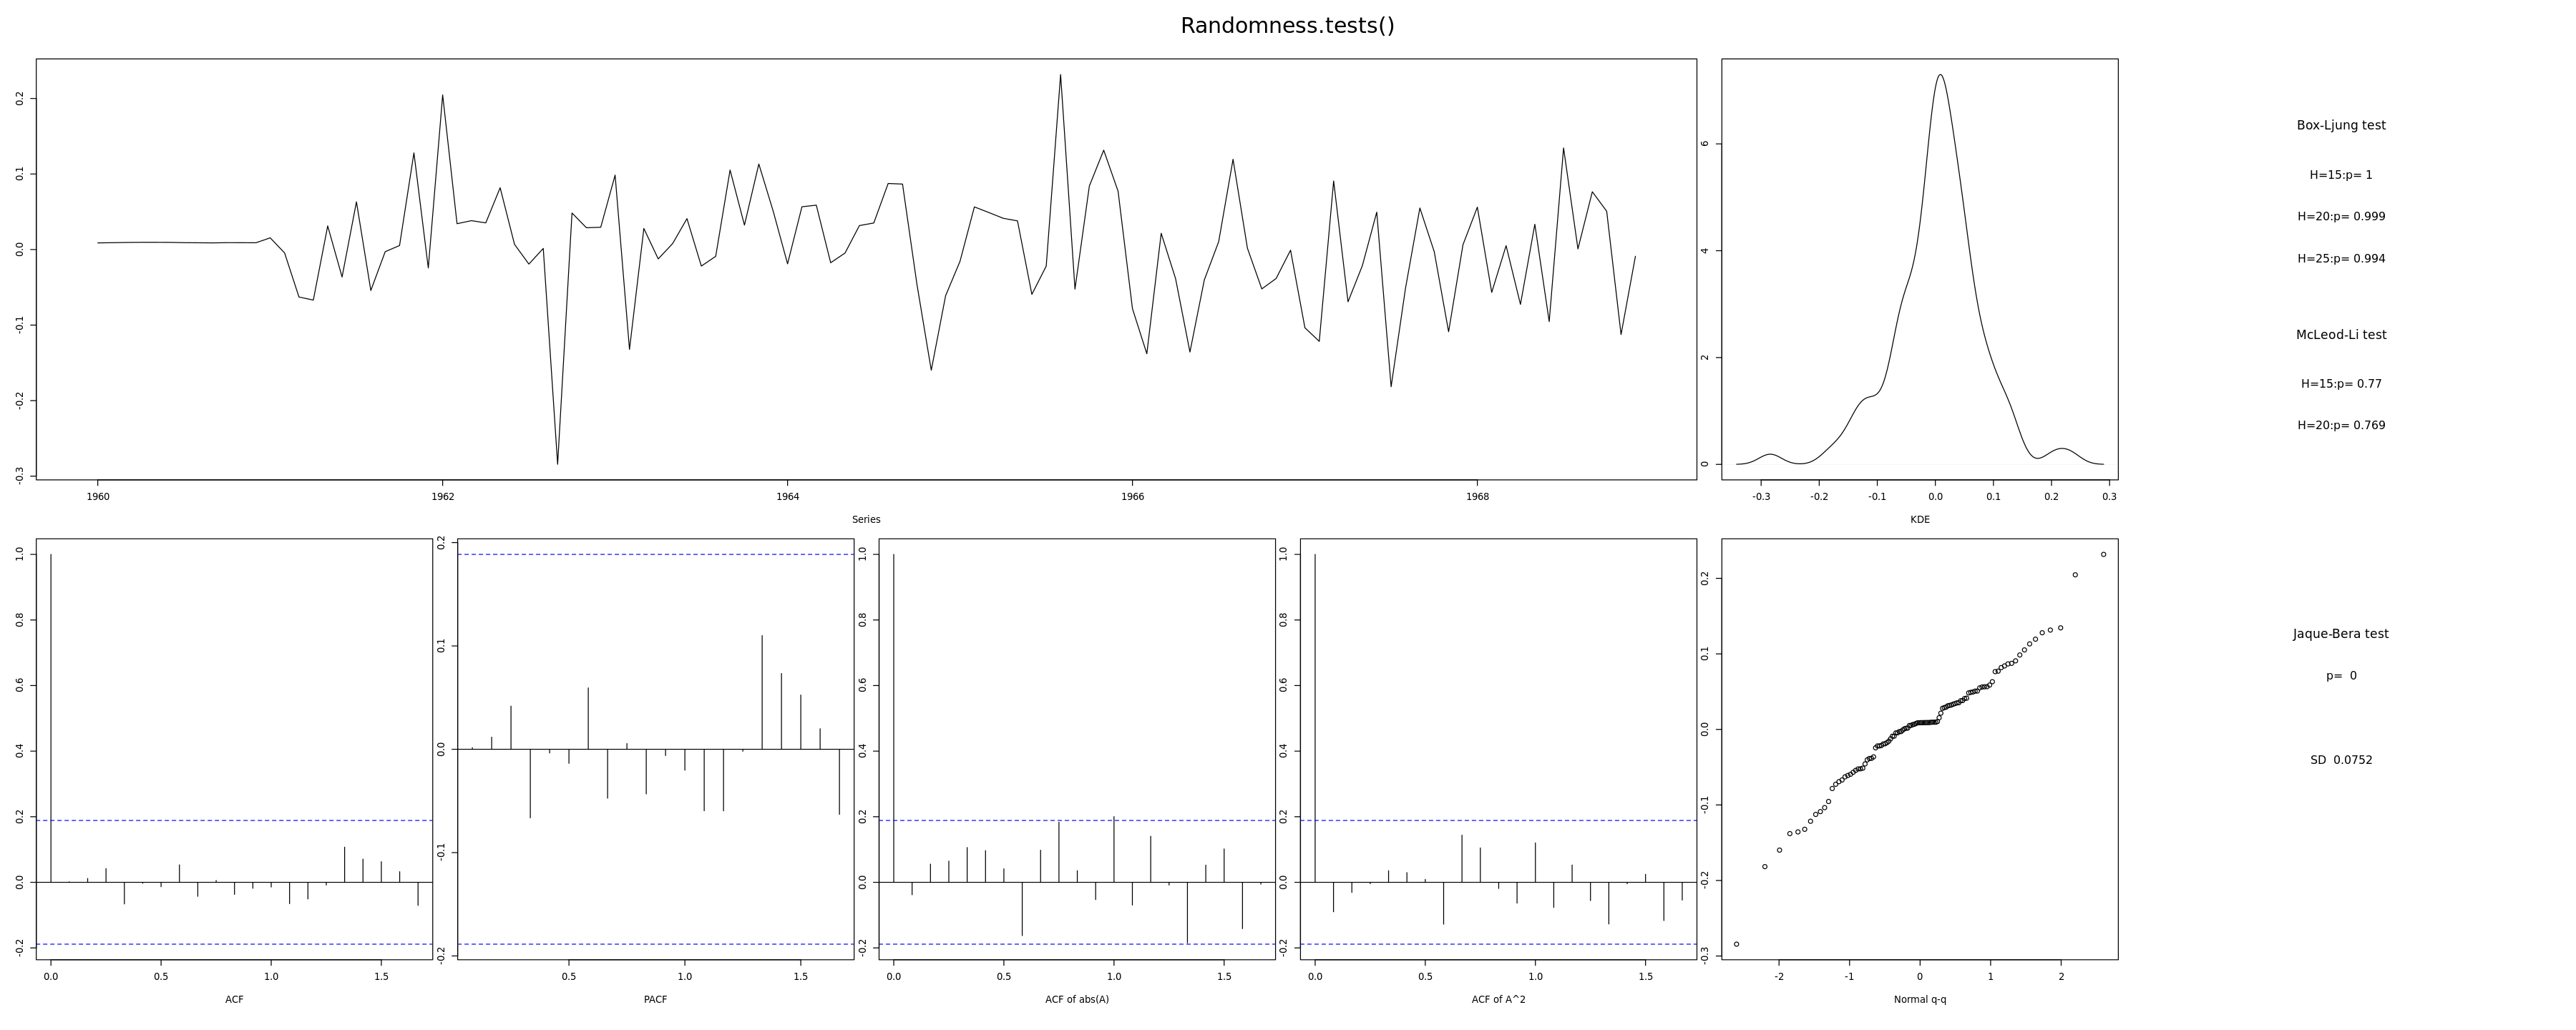

In [13]:
Randomness.tests(Fit22$residuals)

The AR11 term is significant.  And the residuals look good, the ACF and PACF graphs now do not have any issues.

However the terms ar2, ar3, ar4, ar5, ar6, ar8, ar9, and ar10 are not significant.  Because of all of these extra terms not contributing to the model, the AICc score is higher.

### Try changing the seasonal length to 11
Since we do not have a sar term, and there seems to be correlation at lag 11, try using a seasonal length of 11 instead of 12

In [19]:
D11 <- ts(D[,2], start=c(1960,1), freq=11)

In [20]:
Fit25 <- auto.arima(D11, lambda=0, stepwise = FALSE, approximation = FALSE)
Fit25

Series: D11 
ARIMA(0,1,5) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ma1      ma2      ma3      ma4     ma5   drift
      -0.3587  -0.4776  -0.4709  -0.4136  0.8225  0.0059
s.e.   0.0715   0.0757   0.0745   0.0791  0.0926  0.0018

sigma^2 estimated as 0.03294:  log likelihood=29.89
AIC=-45.77   AICc=-44.64   BIC=-27.06

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15 BL20 BL25 ML15  ML20  JB    SD   
[1,] 0    0    0    0.187 0.398 0.613 0.176

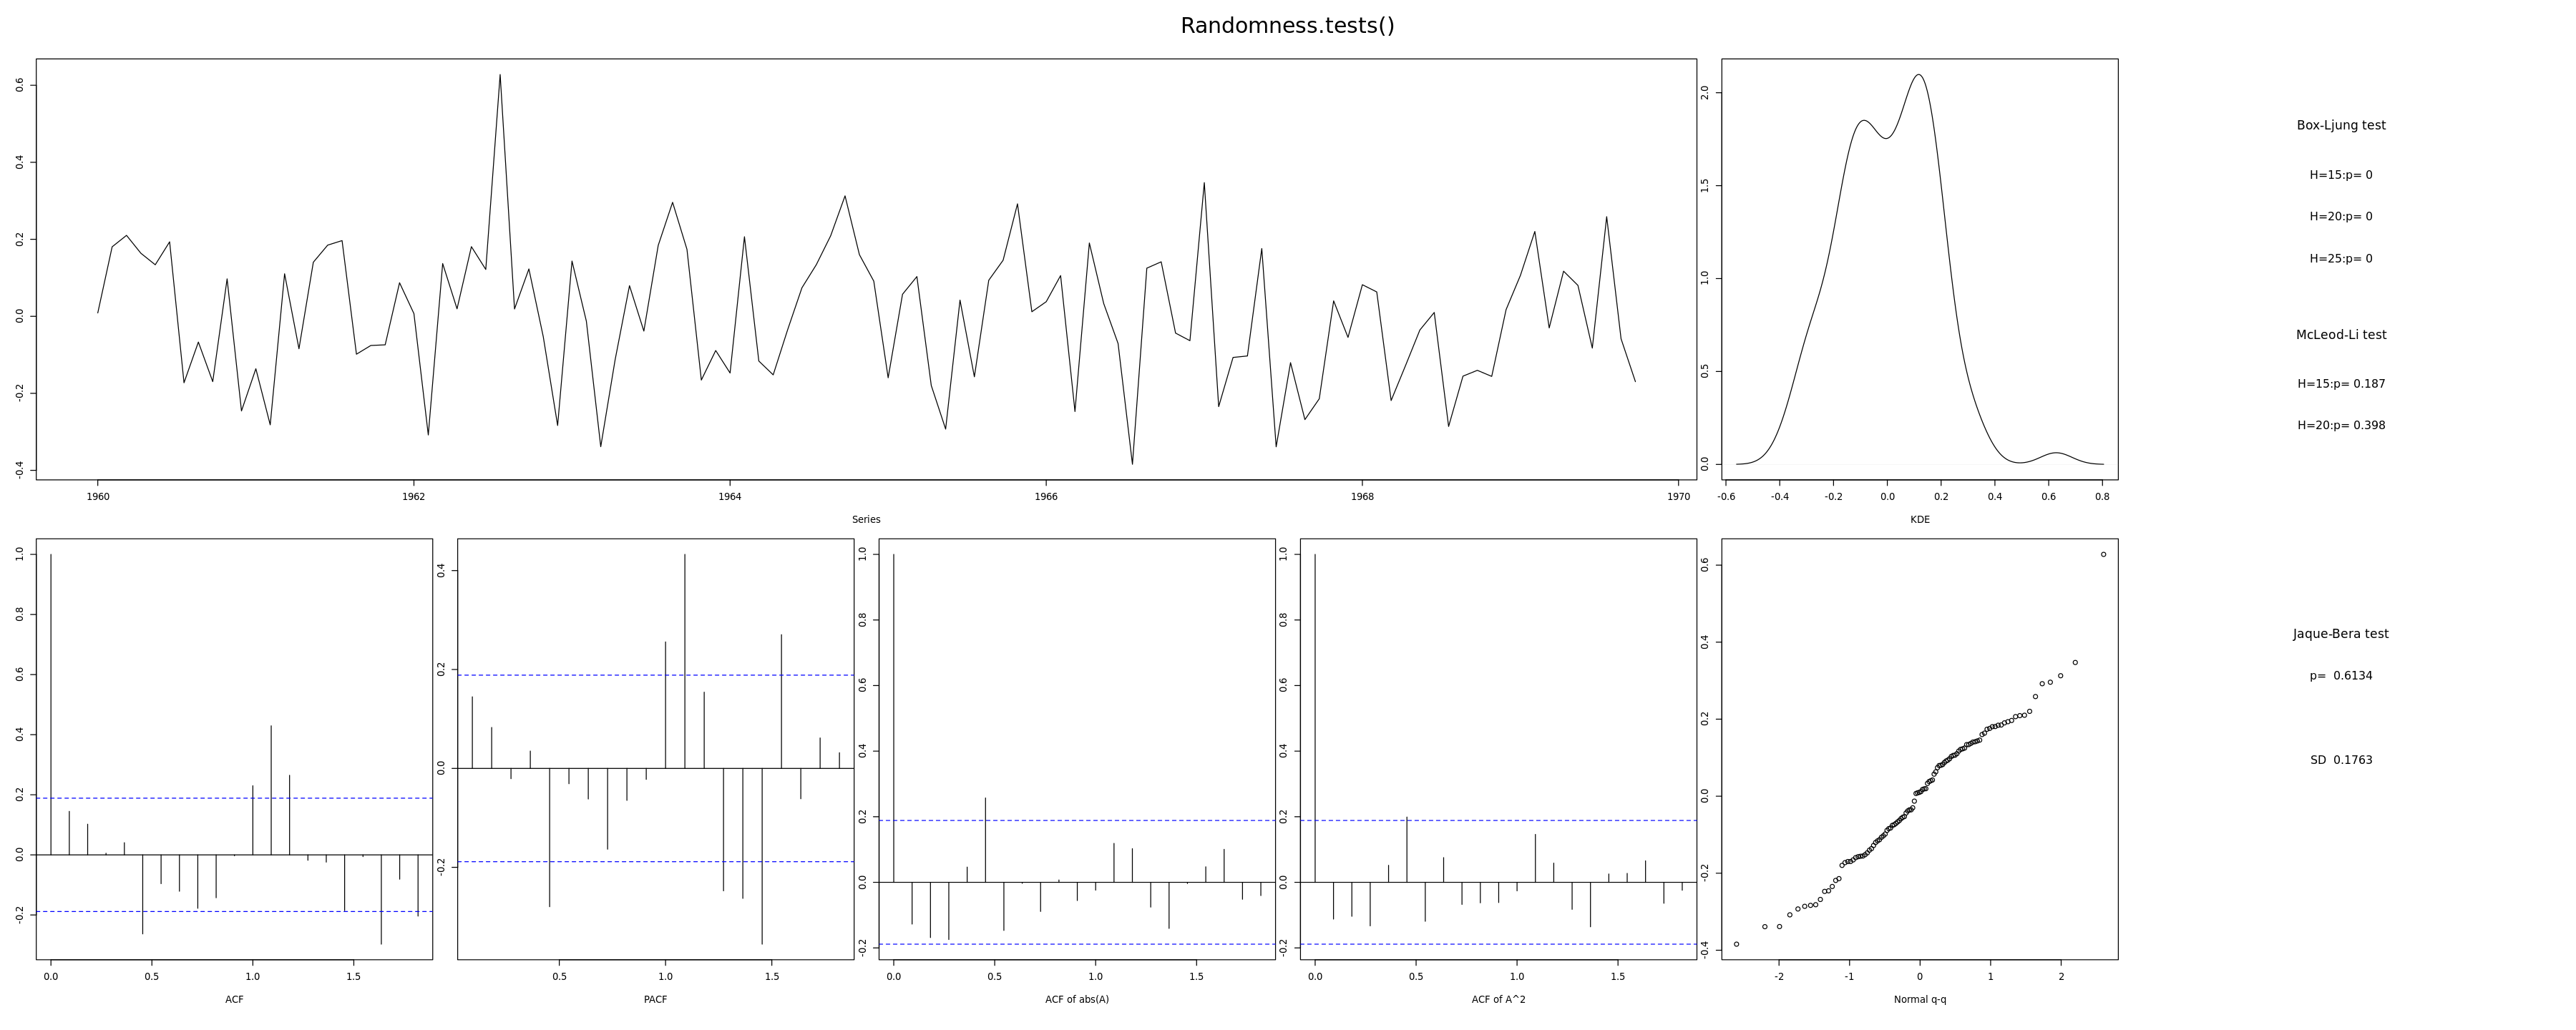

In [22]:
Randomness.tests(Fit25$residuals)

There is a lot of correlation at lag 12, more correlation than we where seeing at lag 11 when we had the seasonal length set to 12.  The Box-Ljung numbers are all 0, confirming that there is a lot of correlation.  The AICc number is higher.  Everything indicates that this is a worse model.

### Investigate d and D

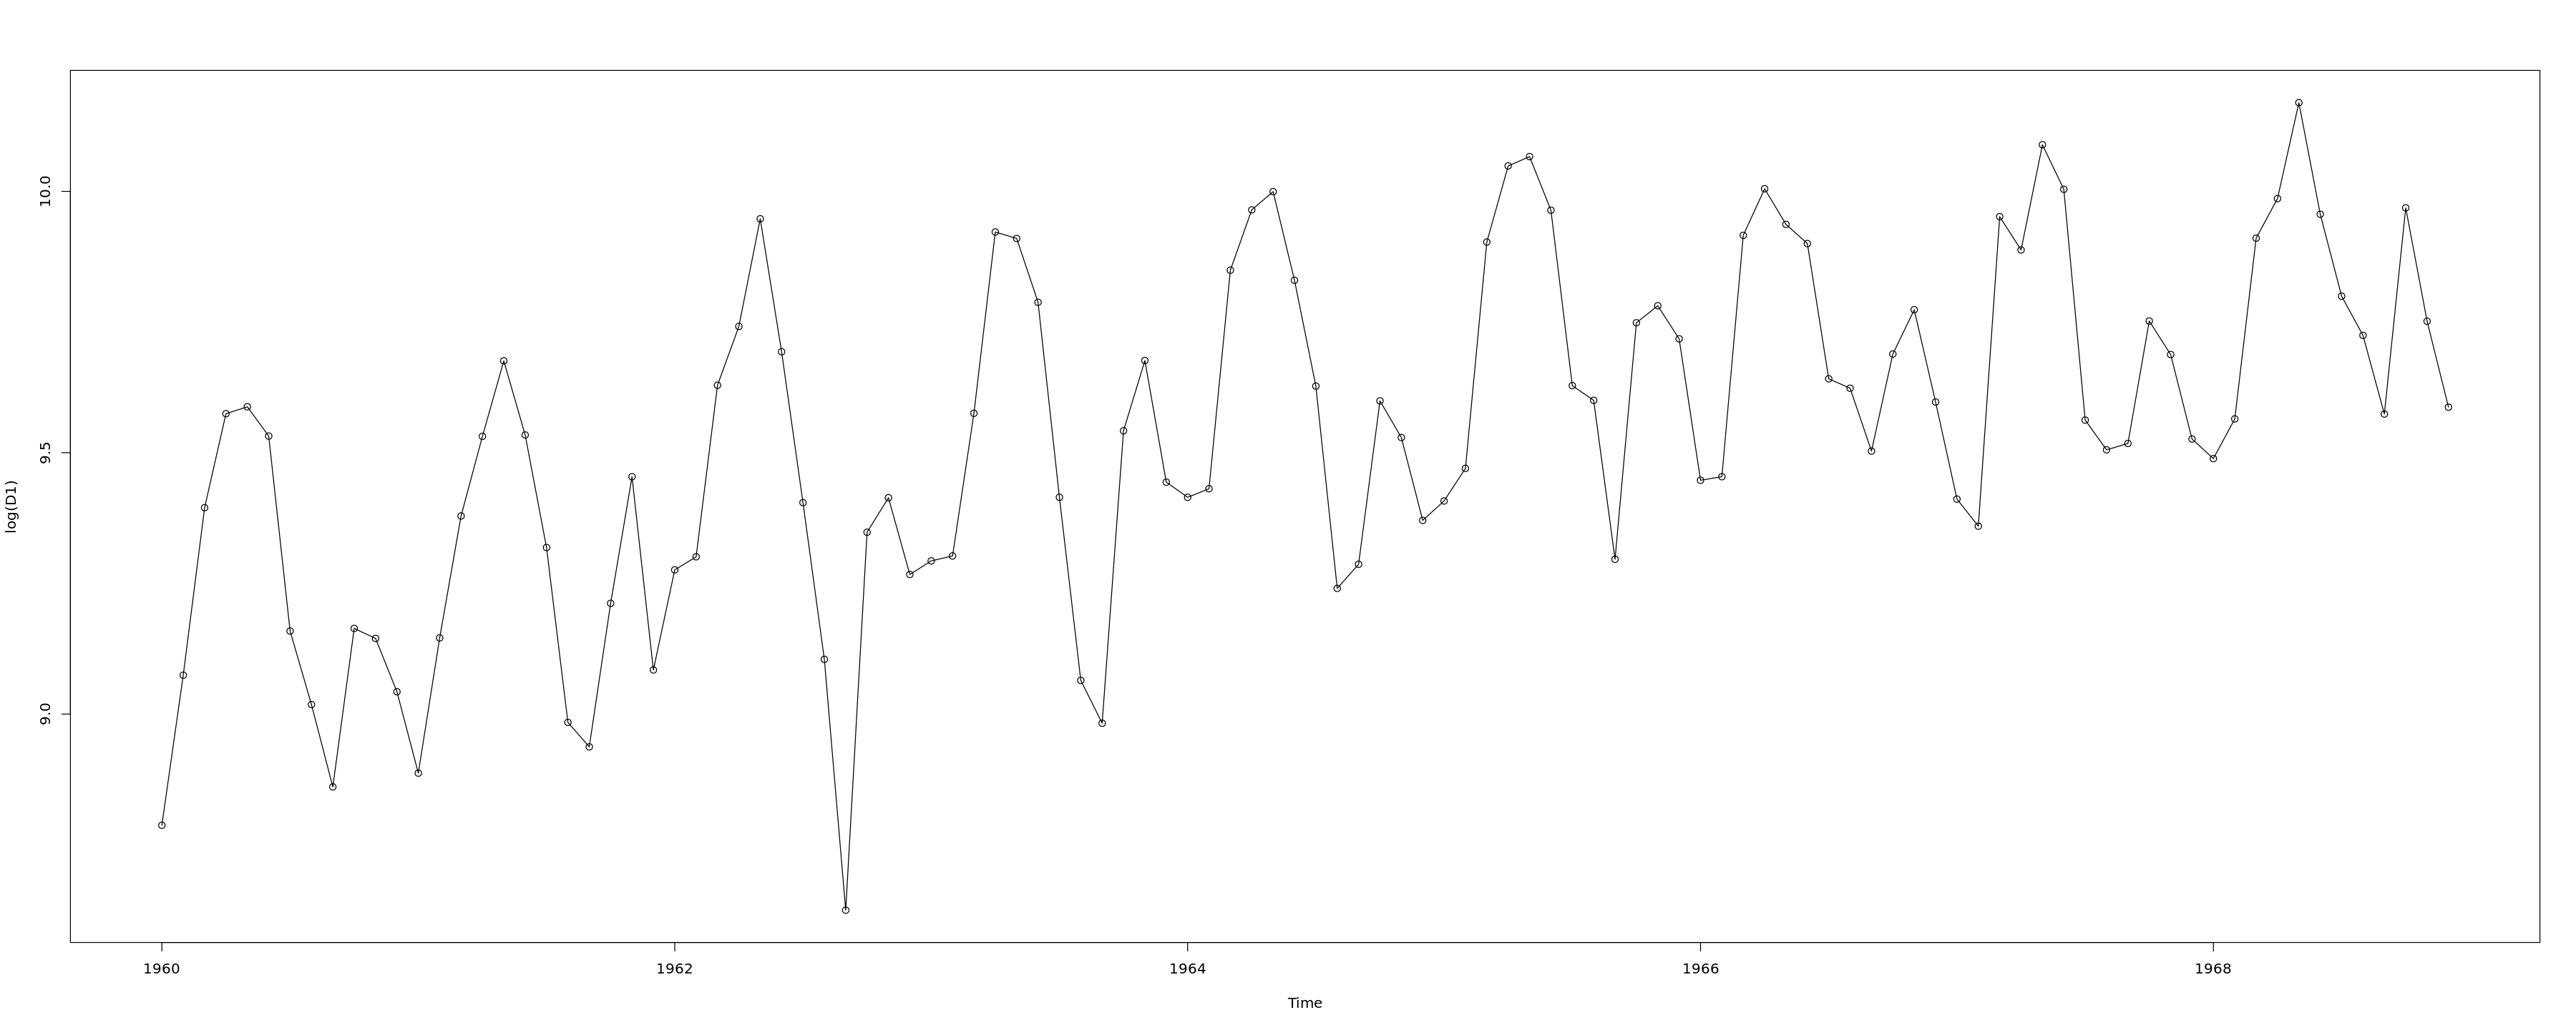

In [9]:
plot(log(D1), type='o')

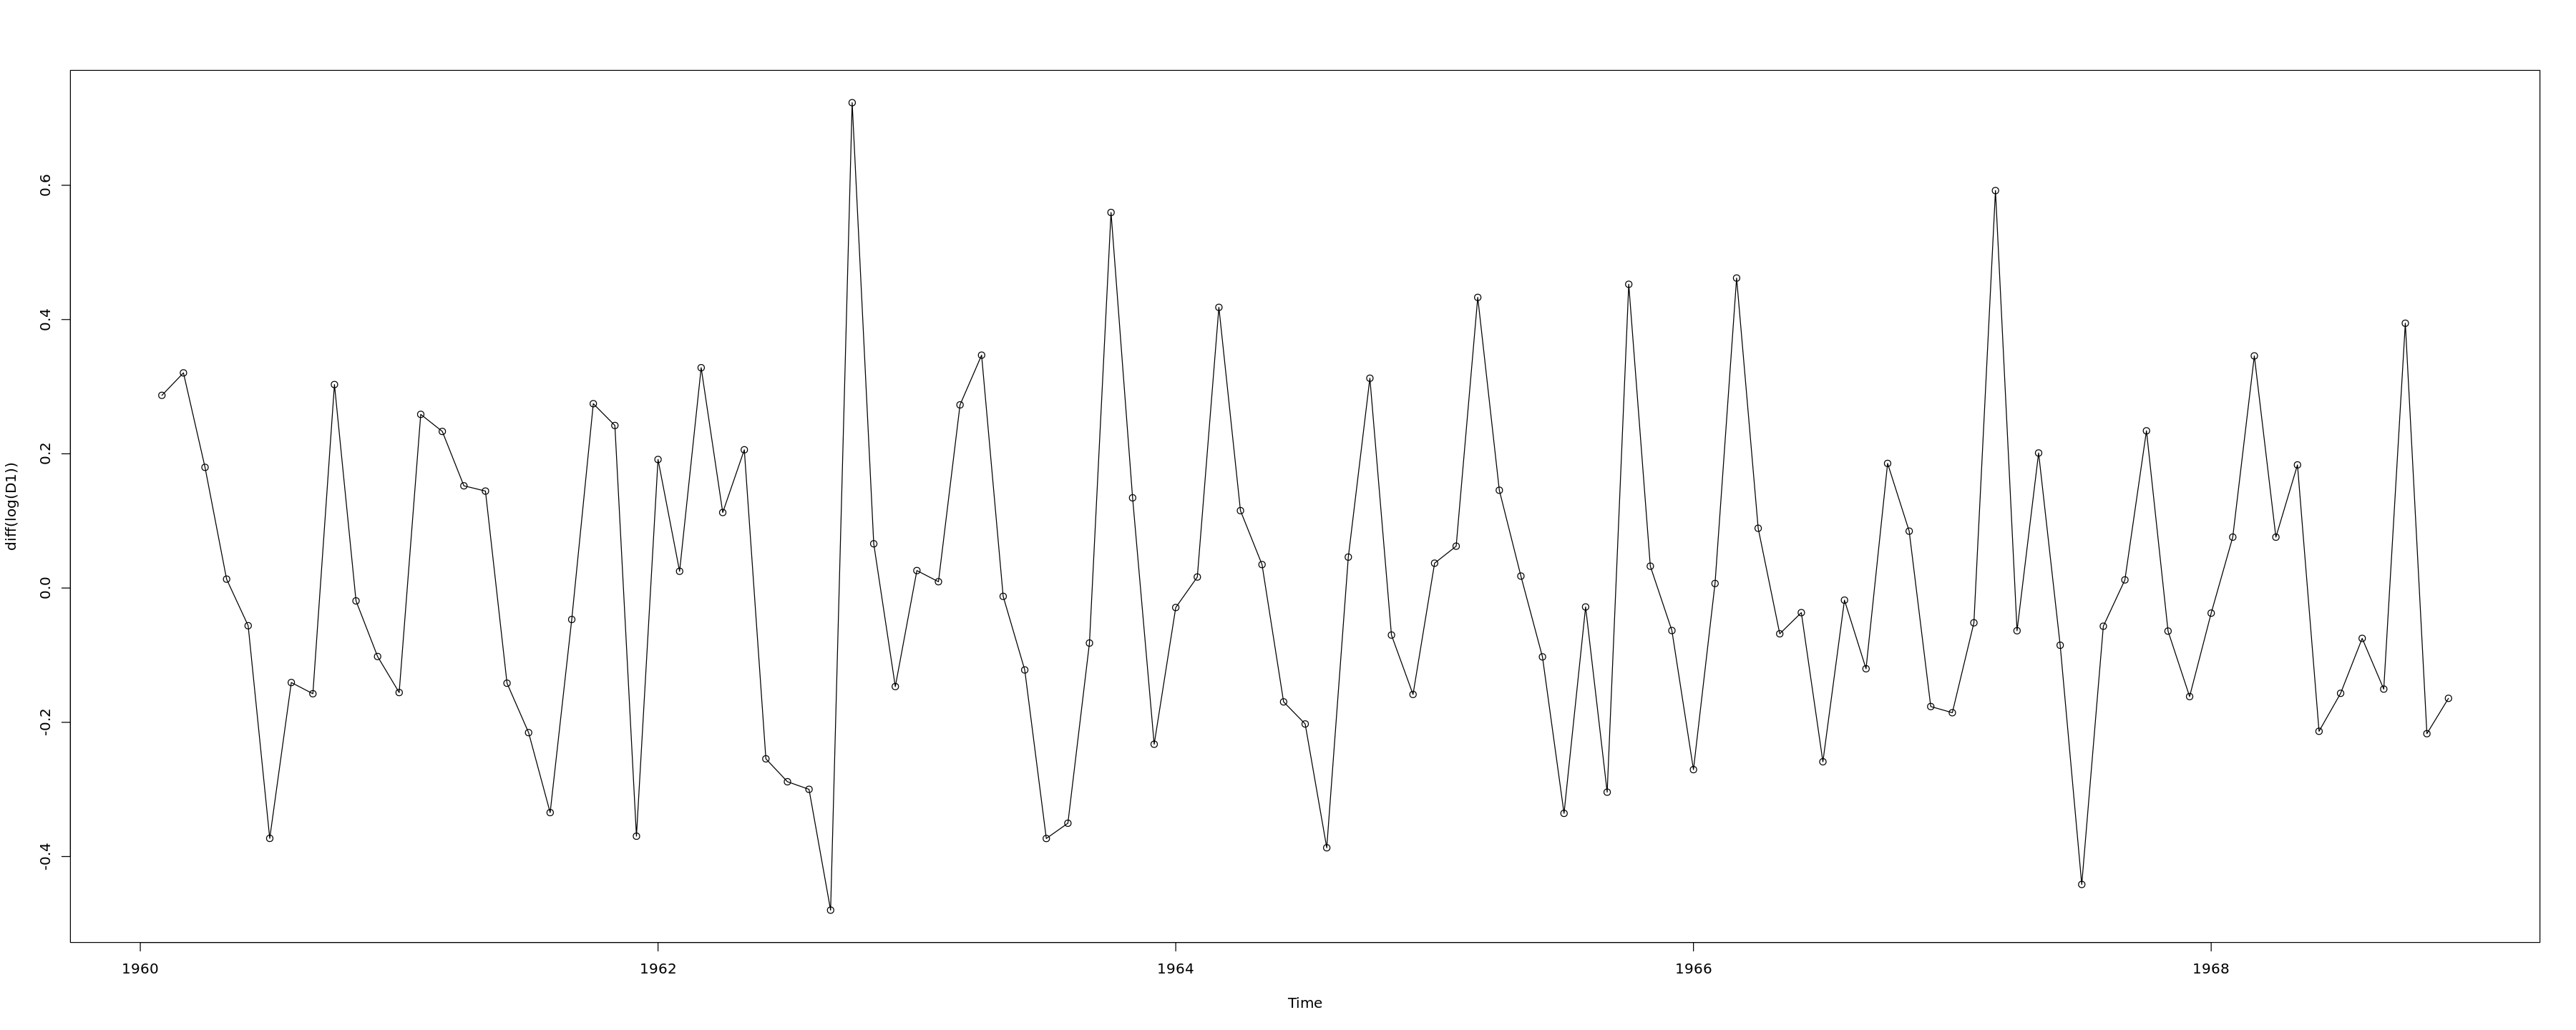

In [10]:
plot(diff(log(D1)), type='o')

In [11]:
Stationarity.tests(diff(log(D1)))

Warning message in adf.test(A):
“p-value smaller than printed p-value”
Warning message in pp.test(A):
“p-value smaller than printed p-value”
Warning message in kpss.test(A):
“p-value greater than printed p-value”


KPSS ADF  PP  
p-val: 0.1  0.01 0.01

It is stationary with d=1

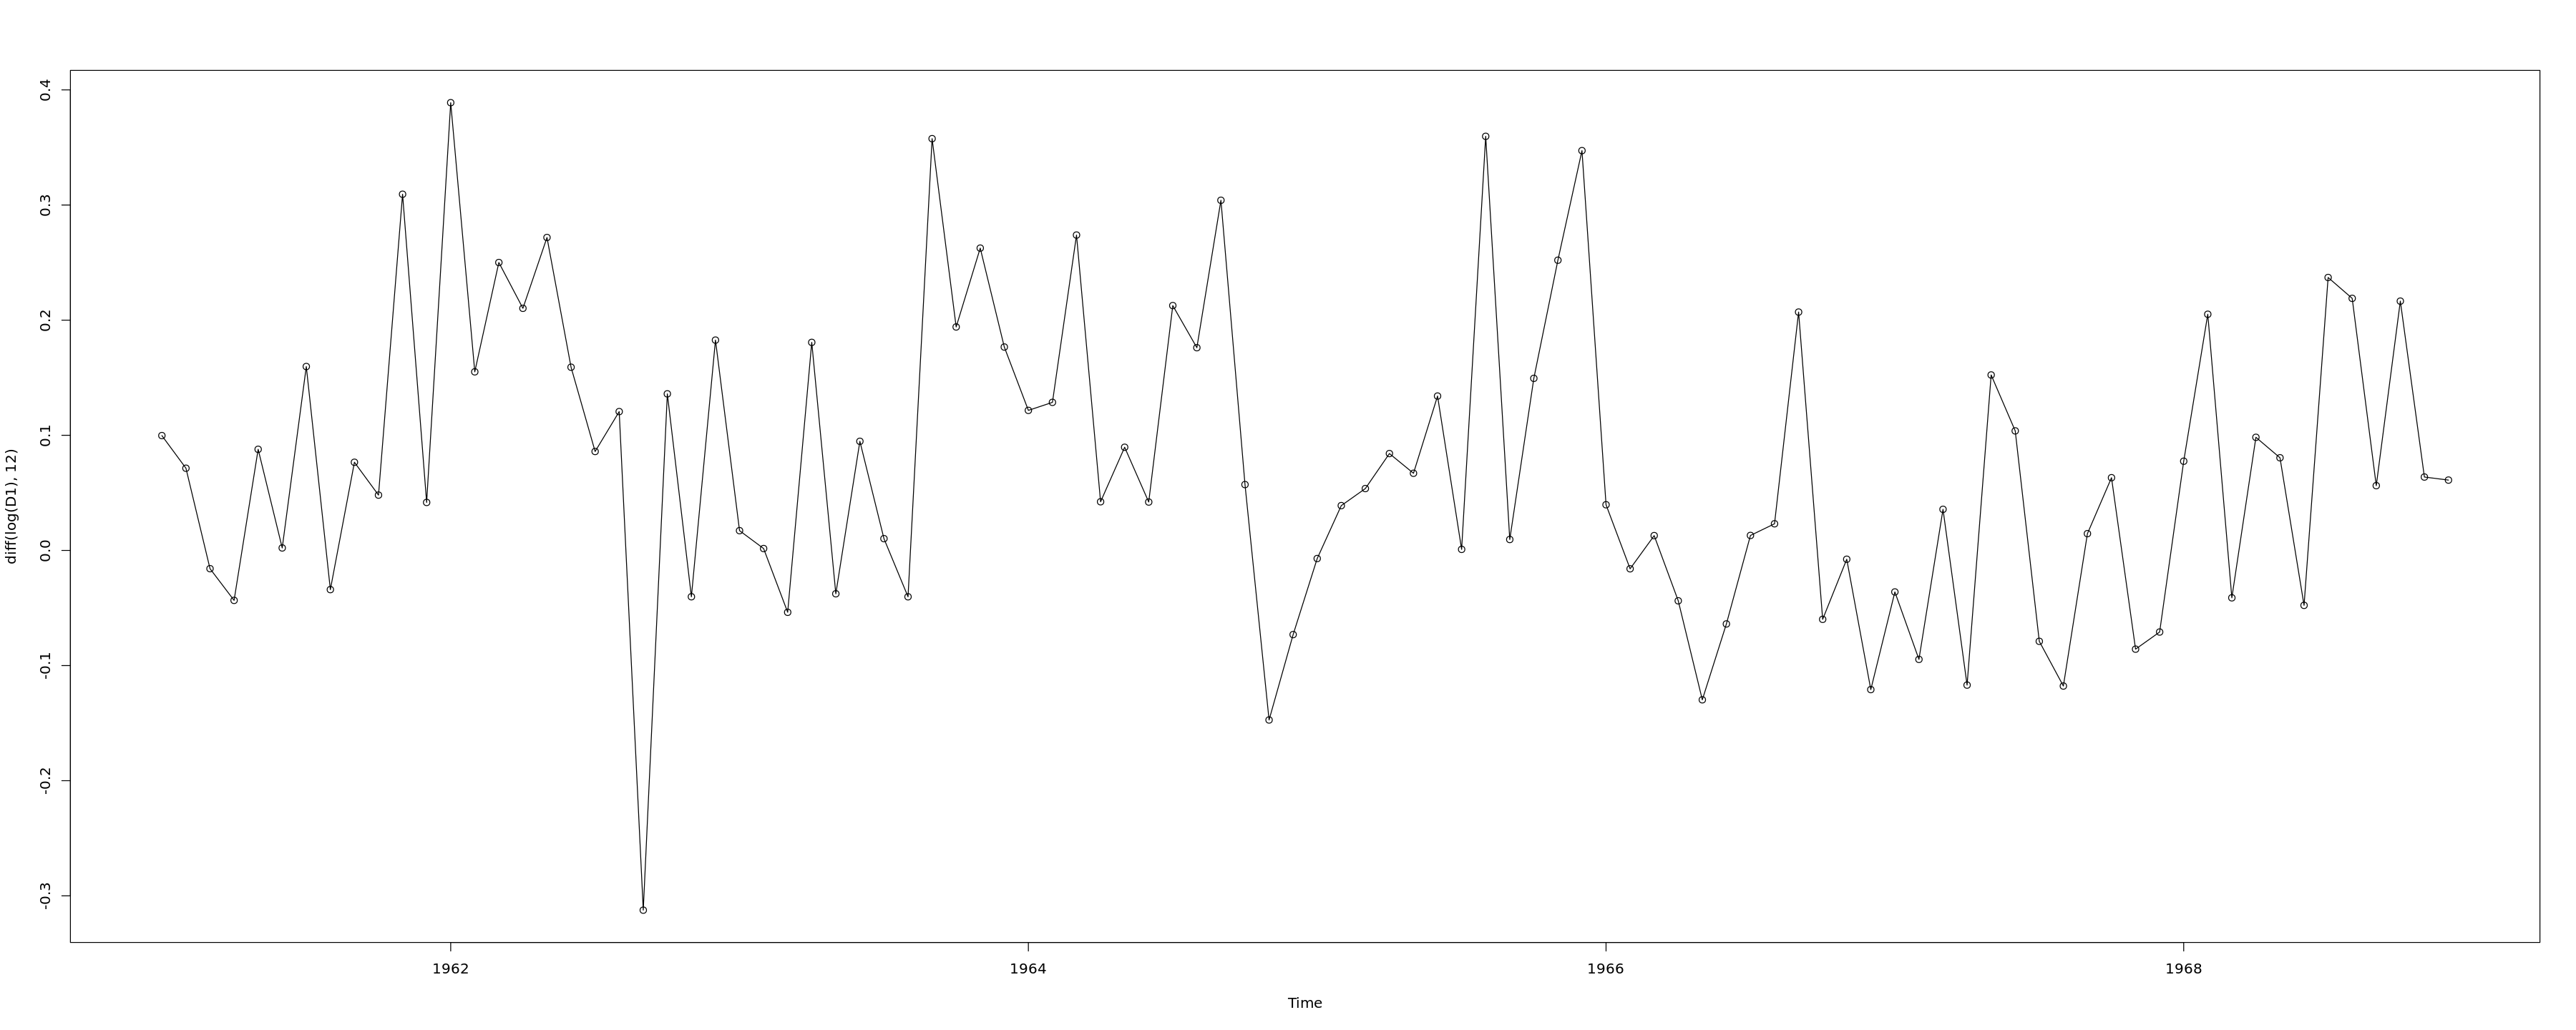

In [12]:
plot(diff(log(D1), 12), type='o')

In [13]:
Stationarity.tests(diff(log(D1), 12))

Warning message in pp.test(A):
“p-value smaller than printed p-value”
Warning message in kpss.test(A):
“p-value greater than printed p-value”


KPSS ADF   PP  
p-val: 0.1  0.024 0.01

It is stationary with D=1.

### Try it with just d=1 (D=0)

In [14]:
Fit3 <- auto.arima(D1, d=1, D=0, lambda=0, stepwise = FALSE, approximation = FALSE)
Fit3

Series: D1 
ARIMA(0,1,3)(1,0,0)[12] 
Box Cox transformation: lambda= 0 

Coefficients:
          ma1     ma2      ma3    sar1
      -0.7108  0.0702  -0.2772  0.8592
s.e.   0.1014  0.1206   0.0905  0.0439

sigma^2 estimated as 0.01491:  log likelihood=66.93
AIC=-123.85   AICc=-123.26   BIC=-110.49

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15  BL20  BL25  ML15  ML20  JB    SD   
[1,] 0.535 0.252 0.266 0.982 0.989 0.108 0.119

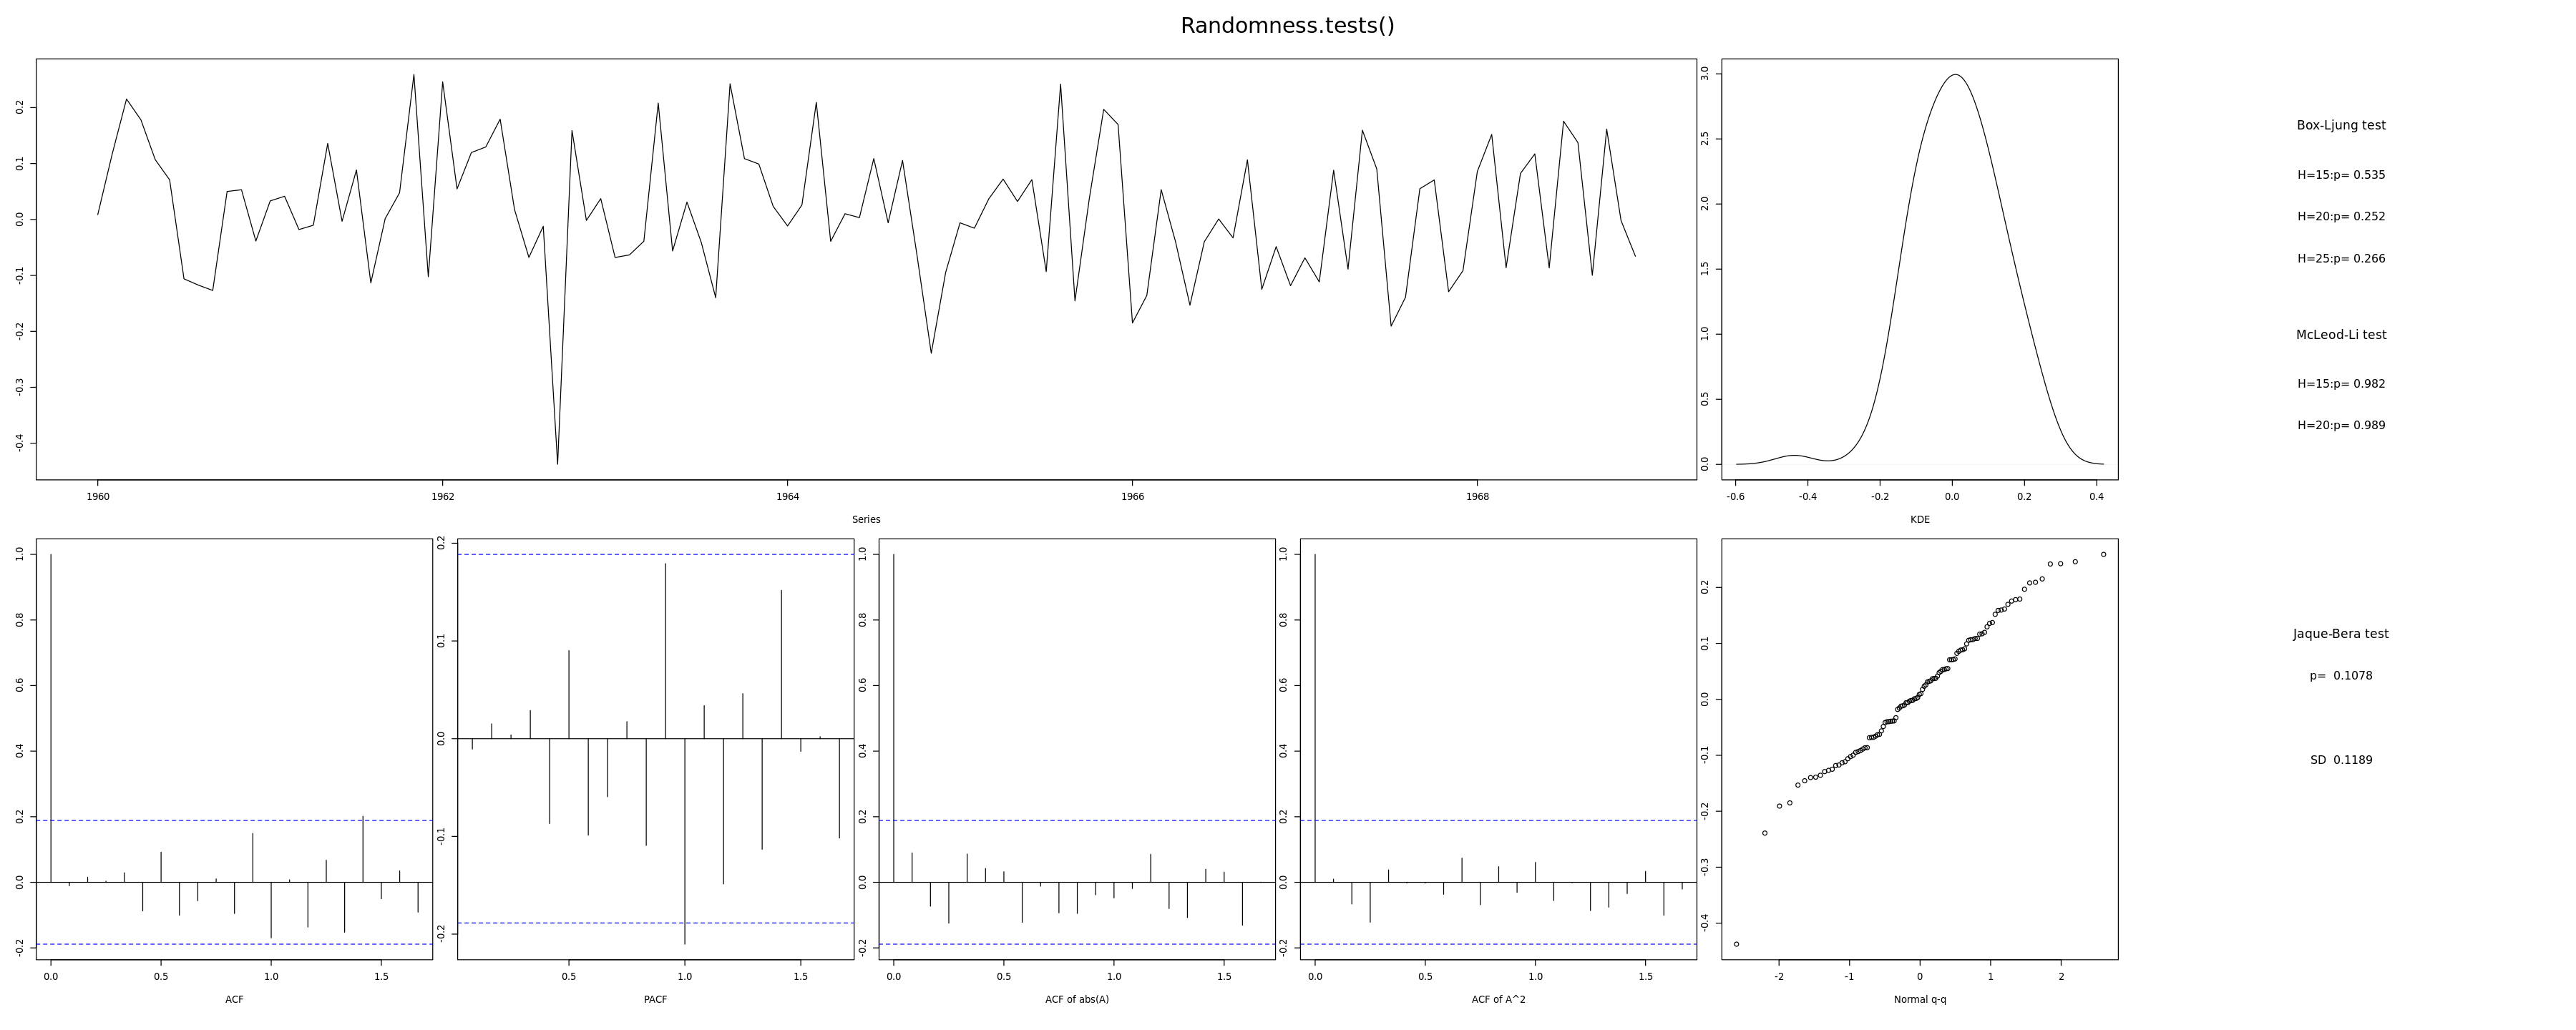

In [15]:
Randomness.tests(Fit3$residuals)

The suggested model is ARIMA(0,1,3)(1,0,0)[12]

The residuals still look good, though the PACF graph is still slightly concerning.

The AICc value is higher.

### Try with a linear trend

In [15]:
Fit4 <- auto.arima(D1, d=0, D=0, lambda=0, xreg=time(D1), stepwise=FALSE, approximation=FALSE)
Fit4

Series: D1 
Regression with ARIMA(0,0,2)(1,0,0)[12] errors 
Box Cox transformation: lambda= 0 

Coefficients:
         ma1     ma2    sar1  intercept    xreg
      0.2462  0.2935  0.8437  -135.9359  0.0740
s.e.  0.0993  0.0924  0.0457    28.6874  0.0146

sigma^2 estimated as 0.01436:  log likelihood=70.87
AIC=-129.73   AICc=-128.9   BIC=-113.64

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15  BL20  BL25  ML15  ML20  JB    SD   
[1,] 0.605 0.267 0.312 0.986 0.984 0.305 0.118

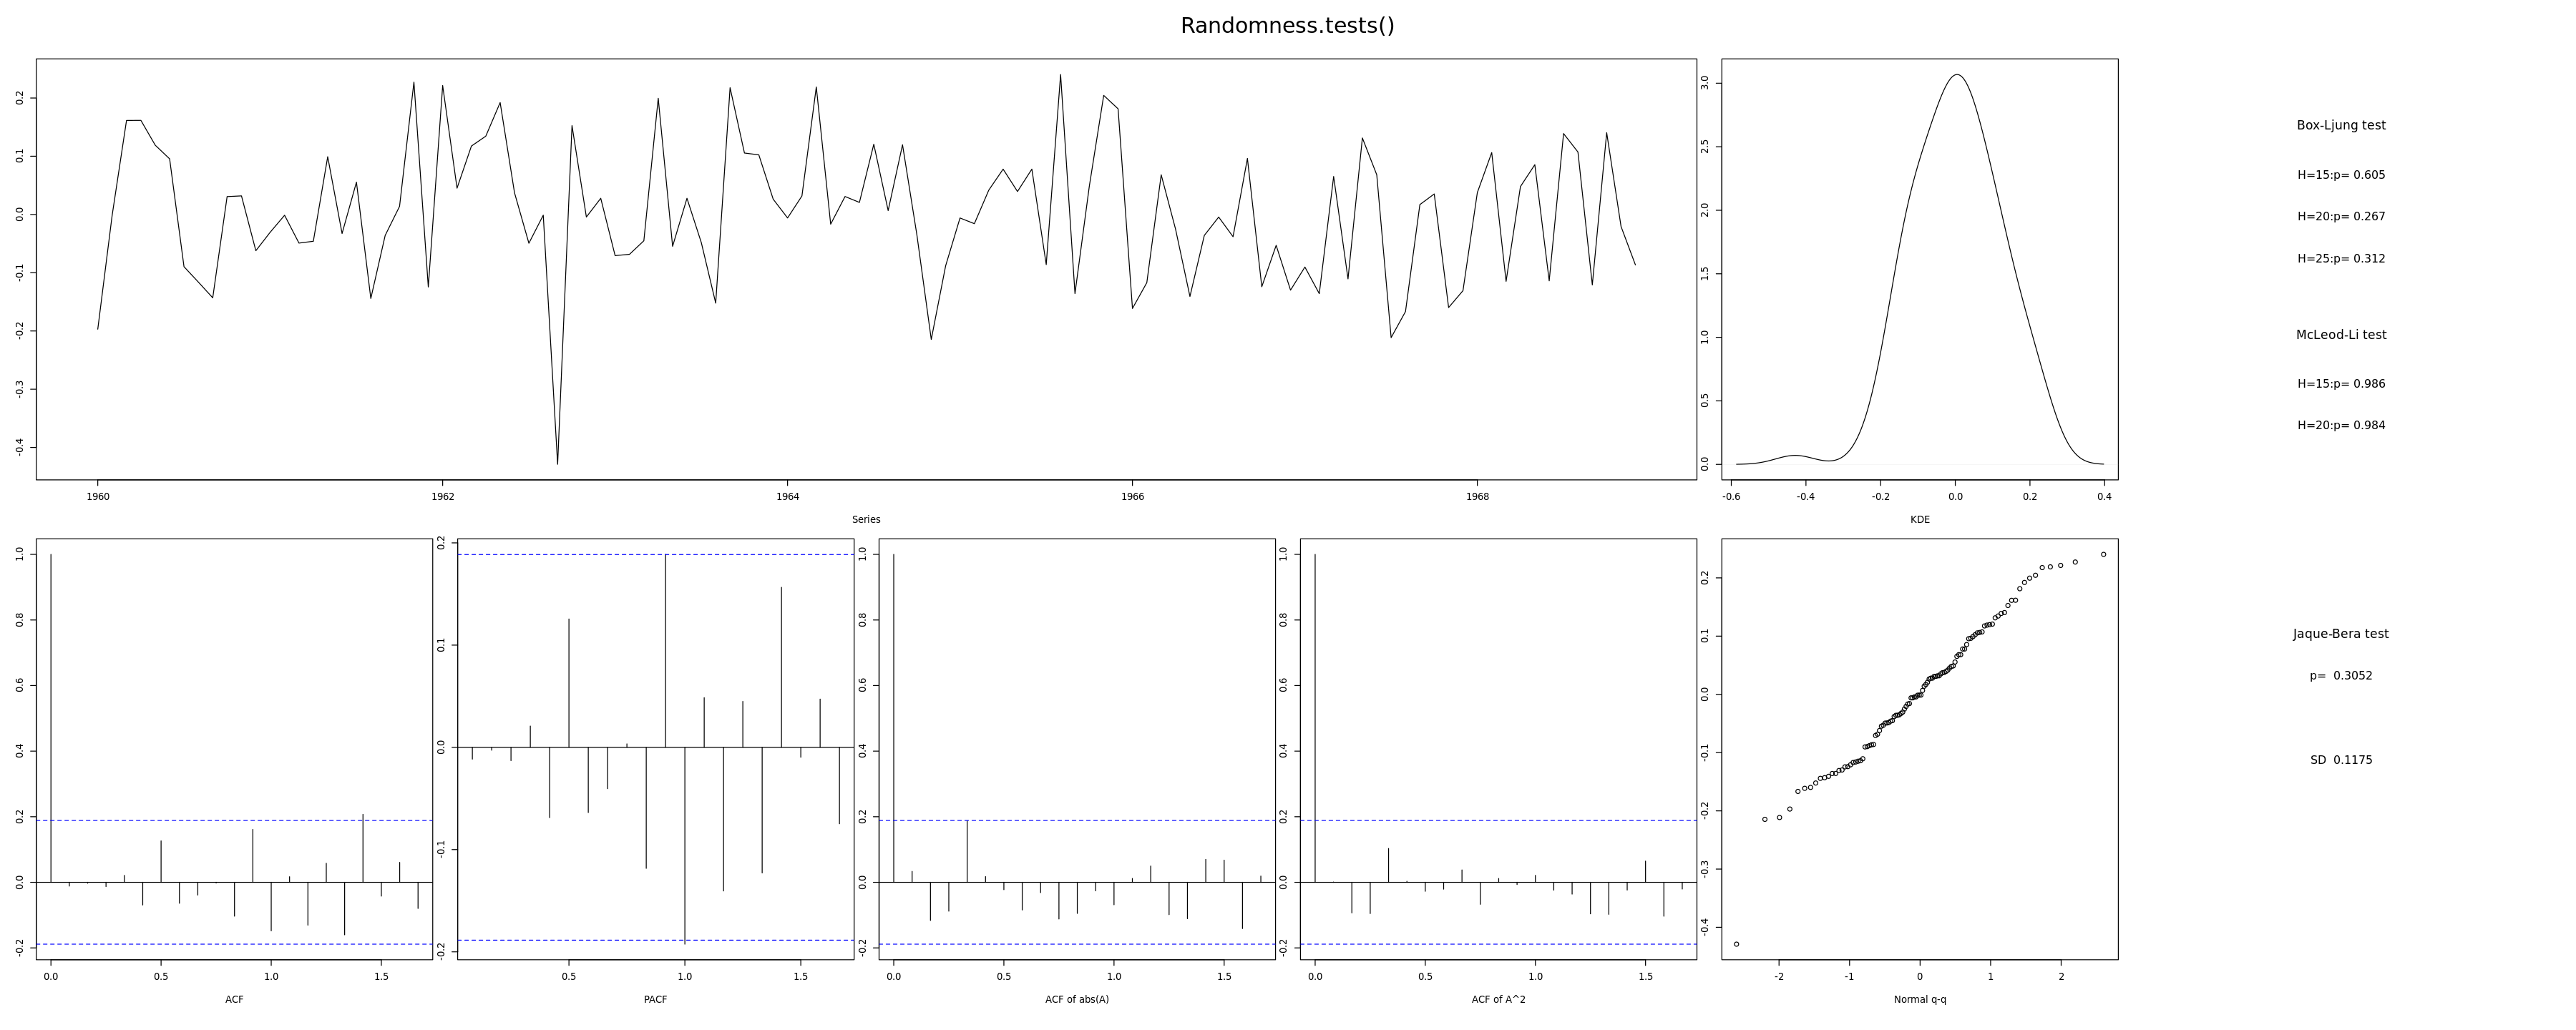

In [16]:
Randomness.tests(Fit4$resid)

## Evaluate Possible models

### Summary of possible models

<table>
  <tr>
    <th></th>
    <th>Model</th>
      <th>Sigma^2</th>
      <th>AICc</th>
      <th>BL</th>
      <th>ML</th>
      <th>JB</th>
      <th>ACF/PACF</th>
  </tr>
    <tr>
        <td>1</td>
        <td>ARIMA(0,1,5) with drift</td>
        <td>0.03294</td>
        <td>-44.64</td>
        <td>Bad</td>
        <td>Good</td>
        <td>Bad</td>
        <td>Correlation</td>
    </tr>
    <tr>
        <td>2</td>
        <td>ARIMA(13,1,0) with drift</td>
        <td>0.01328</td>
        <td>-124.91</td>
        <td>Good</td>
        <td>Good</td>
        <td>Good</td>
        <td>Correlation</td>
    </tr>
    <tr>
        <td>3</td>
        <td>ARIMA(17,1,0) with drift</td>
        <td>0.01219</td>
        <td>-125.51</td>
        <td>Good</td>
        <td>Good</td>
        <td>Good</td>
        <td>No Correlation</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Regression with ARIMA(0,0,4)</td>
        <td>0.03288</td>
        <td>-48.82</td>
        <td>Bad</td>
        <td>Bad</td>
        <td>Bad</td>
        <td>Correlation</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Regression with ARIMA(17,0,0)</td>
        <td>0.01254</td>
        <td>-123.98</td>
        <td>Good</td>
        <td>Good</td>
        <td>Marginally Bad</td>
        <td>No Correlation</td>
    </tr>
    <tr>
        <td>6</td>
        <td>ARIMA(2,0,0)(0,1,2)[12] with drift</td>
        <td>0.01179</td>
        <td>-135.91</td>
        <td>Good</td>
        <td>Good</td>
        <td>Bad</td>
        <td>Correlation</td>
    </tr>
    <tr>
        <td>7</td>
        <td>ARIMA(11,0,0)(0,1,1)[12] with drift</td>
        <td>0.01162</td>
        <td>-128.15</td>
        <td>Good</td>
        <td>Good</td>
        <td>Good</td>
        <td>No Correlation</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Regression with ARIMA(0,0,2)(1,0,0)[12]</td>
        <td>0.01436</td>
        <td>-128.9</td>
        <td>Good</td>
        <td>Good</td>
        <td>Bad</td>
        <td>Correlation</td>
    </tr>
</table>

The two models we will choose to evaluate are ARIMA(2,0,0)(0,1,2)[12] with drift, and ARIMA(11,0,0)(0,1,1)[12] with drift.

### Model ARIMA(2,0,0)(0,1,2)[12] with drift

In [5]:
FitE1 <- Arima(D1, lambda=0, order=c(2,0,0), seasonal=c(0,1,2), include.drift = TRUE)
FitE1

Series: D1 
ARIMA(2,0,0)(0,1,2)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ar2     sma1     sma2   drift
      0.2283  0.2408  -0.5055  -0.2896  0.0062
s.e.  0.1014  0.1024   0.1724   0.1587  0.0008

sigma^2 estimated as 0.01179:  log likelihood=74.43
AIC=-136.85   AICc=-135.91   BIC=-121.46

In [6]:
forecast1 <- forecast(FitE1, 12)
forecast1

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1969       14440.60 12553.40 16611.51 11656.37 17889.88
Feb 1969       15827.88 13710.13 18272.74 12706.29 19716.34
Mar 1969       22839.59 19670.94 26518.66 18175.60 28700.41
Apr 1969       25879.64 22267.68 30077.48 20564.41 32568.68
May 1969       28794.70 24760.37 33486.35 22858.85 36271.93
Jun 1969       24477.69 21044.56 28470.89 19426.62 30842.09
Jul 1969       19734.09 16964.90 22955.30 15659.93 24868.20
Aug 1969       17225.26 14807.73 20037.49 13668.50 21707.55
Sep 1969       14719.60 12653.61 17122.90 11680.06 18550.13
Oct 1969       21665.08 18624.25 25202.40 17191.31 27303.08
Nov 1969       20029.83 17218.84 23299.73 15894.19 25241.57
Dec 1969       16949.63 14571.08 19716.45 13450.21 21359.52

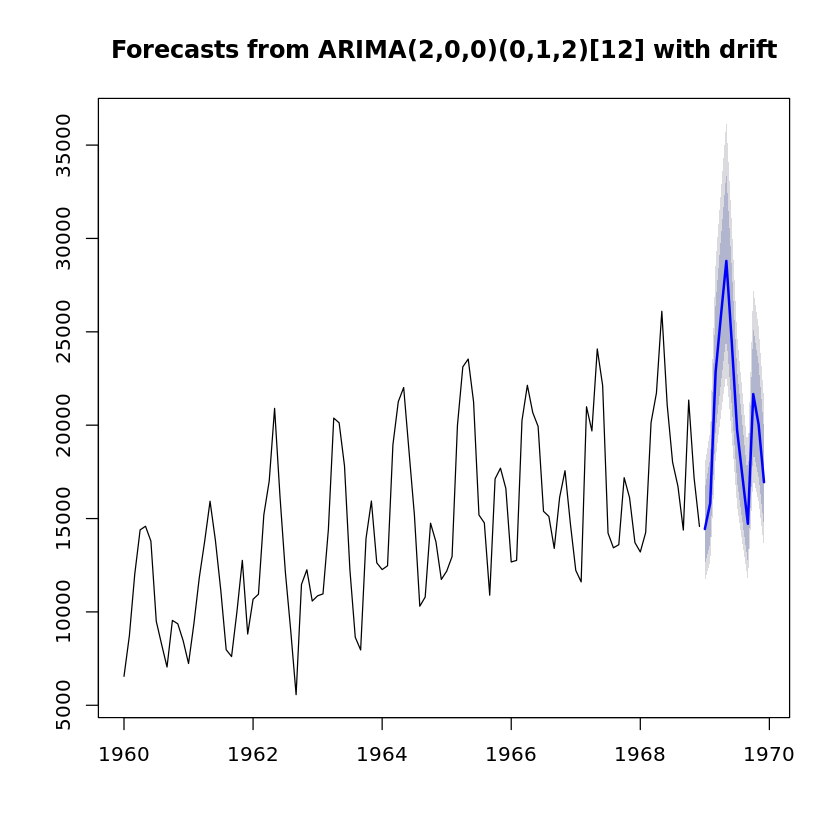

In [7]:
plot(forecast1)

The 95% CI for the next observation is 11,656.37 to 17,889.88


Last  28  obs fit retrospectively
    with Rolling 1-step prediction
  Average prediction error:  -730.574
  root Mean Squared Error:   3470.825 




mean pred error rMSE    
[1,] -730.574        3470.825

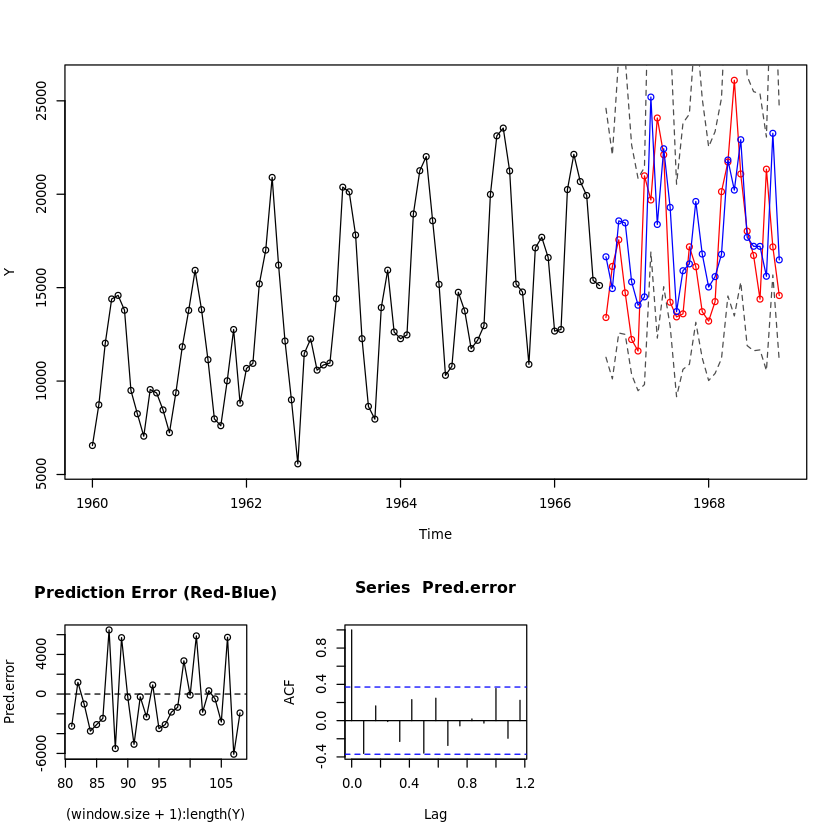

In [9]:
Y <- D1
window.size <- 80
Arima.order <- c(2,0,0)
pred.plot <- TRUE
include.mean = TRUE
include.drift = TRUE
lambda = 0
xreg = FALSE
seasonal = c(0, 1, 2)

Rolling1step.forecast(Y, window.size, Arima.order, pred.plot, include.mean, include.drift, lambda, xreg, seasonal)

### Model ARIMA(11,0,0)(0,1,1)[12] with drift

In [10]:
FitE2 <- Arima(D1, lambda=0, order=c(11,0,0), seasonal=c(0,1,1), include.drift = TRUE)
FitE2

Series: D1 
ARIMA(11,0,0)(0,1,1)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ar2      ar3     ar4      ar5     ar6      ar7      ar8
      0.3427  0.1225  -0.0185  0.0554  -0.0806  0.1814  -0.2220  -0.0005
s.e.  0.1036  0.1065   0.1031  0.1037   0.1025  0.1032   0.0987   0.1030
         ar9     ar10    ar11     sma1   drift
      0.1653  -0.0997  0.3101  -0.6995  0.0062
s.e.  0.1052   0.1047  0.1054   0.1387  0.0012

sigma^2 estimated as 0.01162:  log likelihood=80.67
AIC=-133.34   AICc=-128.15   BIC=-97.44

In [11]:
forecast2 <- forecast(FitE2, 12)
forecast2

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1969       14421.08 12559.30 16558.84 11673.10 17815.95
Feb 1969       14916.77 12889.02 17263.52 11929.69 18651.78
Mar 1969       21342.32 18372.81 24791.79 16971.94 26838.10
Apr 1969       25375.43 21829.28 29497.66 20157.30 31944.39
May 1969       26227.48 22543.50 30513.48 20807.67 33059.01
Jun 1969       24688.56 21220.51 28723.38 19586.43 31119.75
Jul 1969       19828.38 17010.61 23112.92 15684.88 25066.49
Aug 1969       17017.72 14586.86 19853.68 13443.93 21541.53
Sep 1969       15361.26 13164.65 17924.39 12131.99 19450.08
Oct 1969       21285.42 18233.56 24848.09 16799.33 26969.46
Nov 1969       19225.11 16468.54 22443.08 15173.10 24359.21
Dec 1969       16625.18 14176.27 19497.13 13029.49 21213.16

The 95% CI for the next observation is 11,672.10 to 17,815.95


Last  28  obs fit retrospectively
    with Rolling 1-step prediction
  Average prediction error:  -1576.2826
  root Mean Squared Error:   2840.8007 




mean pred error rMSE    
[1,] -1576.283       2840.801

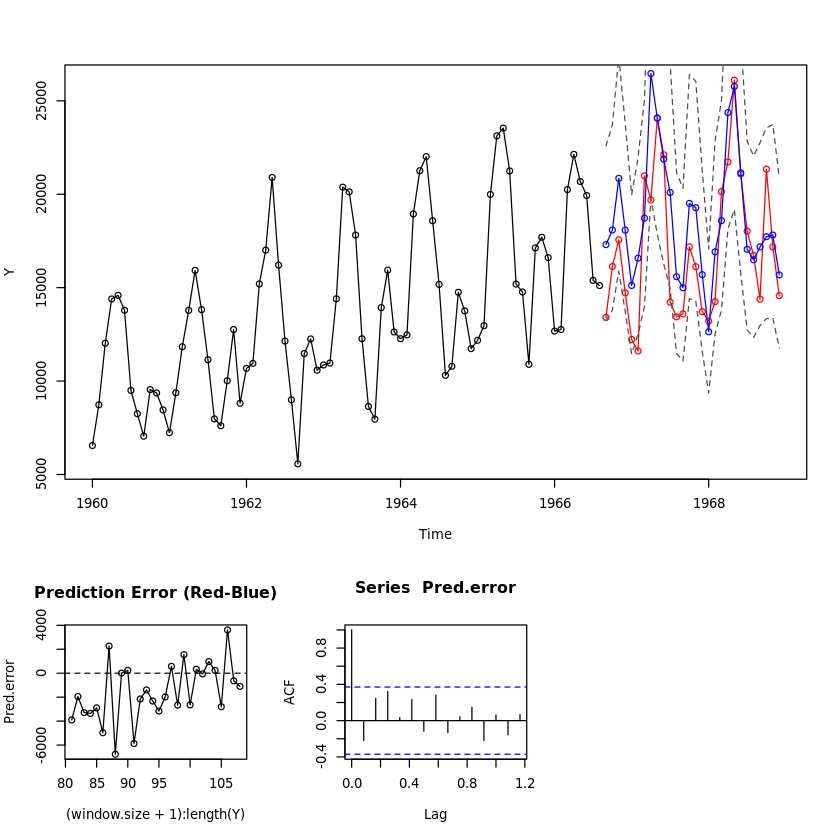

In [12]:
Y <- D1
window.size <- 80
Arima.order <- c(11,0,0)
pred.plot <- TRUE
include.mean = TRUE
include.drift = TRUE
lambda = 0
xreg = FALSE
seasonal = c(0, 1, 1)

Rolling1step.forecast(Y, window.size, Arima.order, pred.plot, include.mean, include.drift, lambda, xreg, seasonal)

## Conclusion

The ARIMA(11,0,0)(0,1,1)[12] with drift has the smallest 95% CI for the next prediction, and the smalles rMSE on rolling predictions, it seems to be performing the best.